In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm


if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [4]:
vsibench = load_dataset("nyu-visionx/VSI-Bench")
df = vsibench["test"].to_pandas()

## Object Count

In [5]:
qdf = df[df["question_type"] == "object_counting"].copy()
qdf["question"].sample(5).values

array(['How many sofa(s) are in this room?',
       'How many table(s) are in this room?',
       'How many table(s) are in this room?',
       'How many stool(s) are in this room?',
       'How many trash bin(s) are in this room?'], dtype=object)

In [6]:
import re

# question format: "What is the length of the longest dimension (length, width, or height) of the OBJECT, measured in centimeters?'"
# question format: "How many OBJECT(s) are in this room?"

qdf["object"] = qdf["question"].str.extract(r'How many (.*?)\(s\) are in this room?')[0]
qdf["ground_truth_num"] = pd.to_numeric(qdf["ground_truth"], errors="coerce")

qdf["object"].value_counts()

object
chair             123
table              98
sofa               44
door               37
pillow             23
monitor            23
trash bin          22
window             20
ceiling light      16
backpack           12
keyboard           12
stool              11
whiteboard         10
trash can           9
bed                 9
computer mouse      8
heater              8
tv                  8
plant               7
bookshelf           6
computer tower      5
lamp                5
printer             4
telephone           4
towel               4
mirror              3
refrigerator        3
cup                 3
washer              3
shoes               3
exhaust fan         3
power strip         3
counter             2
toilet              2
bucket              2
laptop              1
nightstand          1
crate               1
coat rack           1
bowl                1
cushion             1
blanket             1
basket              1
pan                 1
suitcase            1
Nam

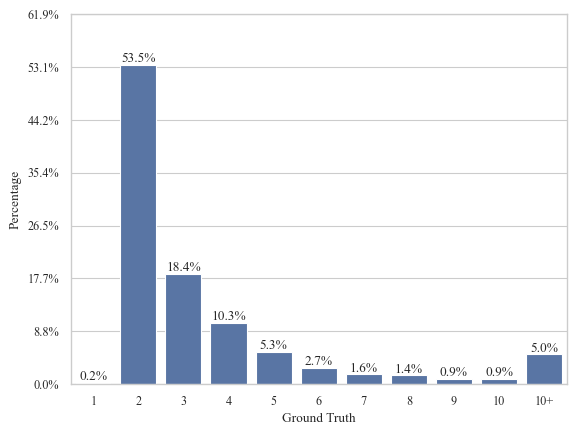

In [14]:
# Calculate total count for percentage calculation
total_count = len(qdf)

# Create a copy of the dataframe and group values > 10 into a single category
plot_df = qdf.copy()
plot_df['grouped_count'] = plot_df['ground_truth_num'].apply(lambda x: '10+' if x > 10 else x)

# Create a histogram of ground truth values with grouped counts
# Sort the x-axis in increasing order
order = [str(i) for i in range(1, 11)] + ['10+']
ax = sns.countplot(data=plot_df, x="grouped_count", order=order)
plt.xlabel("Ground Truth") #, fontsize=9, family='Times New Roman')
plt.ylabel("Percentage") #, fontsize=9, family='Times New Roman')

# Add percentage labels on top of each bar with smaller font
for p in ax.patches:
    percentage = 100 * p.get_height() / total_count
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Convert y-axis to percentage with smaller font
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{100 * y / total_count:.1f}%' for y in y_ticks]) #, fontsize=8, family='Times New Roman')
# plt.xticks(fontsize=8, family='Times New Roman')

# Remove spines
# sns.despine()

# Tighter layout
# plt.tight_layout(pad=0.125)
# plt.tight_layout()
print()


/var/folders/p3/nxvlm0md3bndzfhvxv5233dr0000gn/T/ipykernel_5196/2655610829.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=plot_df, x="grouped_count", order=order, palette="Blues_d")


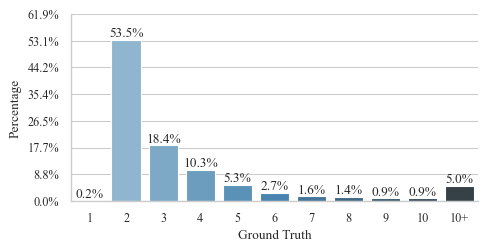

In [18]:
# Visualize the distribution of ground truth values as percentages
# Set figure size to exactly 194 points width (convert points to inches: 194pt / 72pt/in = 2.69in)

# set sns theme to paper
sns.set_theme("paper", "whitegrid")

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

width = 194 * 1.75

plt.figure(figsize=(width / 72, width / 72 * 0.5))

# Calculate total count for percentage calculation
total_count = len(qdf)

# Create a copy of the dataframe and group values > 10 into a single category
plot_df = qdf.copy()
plot_df['grouped_count'] = plot_df['ground_truth_num'].apply(lambda x: '10+' if x > 10 else x)

# Create a histogram of ground truth values with grouped counts
# Sort the x-axis in increasing order
order = [str(i) for i in range(1, 11)] + ['10+']
ax = sns.countplot(data=plot_df, x="grouped_count", order=order, palette="Blues_d")
plt.xlabel("Ground Truth") #, fontsize=9, family='Times New Roman')
plt.ylabel("Percentage") #, fontsize=9, family='Times New Roman')

# Add percentage labels on top of each bar with smaller font
for p in ax.patches:
    percentage = 100 * p.get_height() / total_count
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Convert y-axis to percentage with smaller font
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{100 * y / total_count:.1f}%' for y in y_ticks]) #, fontsize=8, family='Times New Roman')
# plt.xticks(fontsize=8, family='Times New Roman')

# Remove spines
sns.despine()

# Tighter layout
plt.tight_layout(pad=0.125)
# plt.tight_layout()
print()


In [8]:
# pd turn max col = 1000
pd.set_option("display.max_columns", 1000)
qdf.groupby("object")["ground_truth_num"].value_counts().unstack().fillna(0).astype(int).T.reset_index().sort_values("ground_truth_num", ascending=False).set_index("ground_truth_num").T

ground_truth_num  47  40  38  36  27  25  23  22  19  18  17  16  14  12  11  \
object                                                                         
backpack           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
basket             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
bed                0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
blanket            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
bookshelf          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
bowl               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
bucket             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
ceiling light      0   0   0   0   0   1   0   0   0   0   0   0   0   3   0   
chair              1   1   1   2   2   0   1   1   0   3   3   1   1   1   1   
coat rack          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
computer mouse     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
computer tower     0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
counter            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
crate              0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
cup                0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
cushion            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
door               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
exhaust fan        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
heater             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
keyboard           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
lamp               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
laptop             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
mirror             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
monitor            0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
nightstand         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
pan                0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
pillow             0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
plant              0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
power strip        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
printer            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
refrigerator       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
shoes              0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
sofa               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
stool              0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
suitcase           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
table              0   0   0   0   0   0   0   0   1   0   0   0   0   0   1   
telephone          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
toilet             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
towel              0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
trash bin          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
trash can          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
tv                 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
washer             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
whiteboard         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
window             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

ground_truth_num  10  9   8   7   6   5   4   3   2   1   
object                                                    
backpack           0   0   0   0   0   0   0   2  10   0  
basket             0   0   0   0   0   0   1   0   0   0  
bed

In [9]:
qdf

id      dataset    scene_name    question_type  \
0        0  arkitscenes      41069025  object_counting   
1        1  arkitscenes      41069025  object_counting   
2        2  arkitscenes      41069043  object_counting   
3        3  arkitscenes      41125700  object_counting   
4        4  arkitscenes      41125700  object_counting   
...    ...          ...           ...              ...   
4584  4604      scannet  scene0231_00  object_counting   
4585  4605      scannet  scene0231_00  object_counting   
4586  4606      scannet  scene0246_00  object_counting   
4587  4607      scannet  scene0246_00  object_counting   
4588  4608      scannet  scene0246_00  object_counting   

                                     question ground_truth options  \
0         How many table(s) are in this room?            4    None   
1         How many chair(s) are in this room?            2    None   
2         How many table(s) are in this room?            2    None   
3          How many sofa(s) are in this room?            2    None   
4         How many table(s) are in this room?            3    None   
...                                       ...          ...     ...   
4584  How many trash bin(s) are in this room?            2    None   
4585      How many table(s) are in this room?            2    None   
4586     How many pillow(s) are in this room?            6    None   
4587       How many lamp(s) are in this room?            2    None   
4588     How many mirror(s) are in this room?            2    None   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  \
0                       0.0                    0.0         0.1   
1                       0.1                    0.1         1.0   
2                       0.1                    0.1         1.0   
3                       0.1                    0.1         1.0   
4                       0.0                    0.0         0.4   
...                     ...                    ...         ...   
4584                    0.1                    0.1         1.0   
4585                    0.1                    0.1         1.0   
4586                    0.0                    0.0         1.0   
4587                    0.1                    0.1         1.0   
4588                    0.1                    0.1         1.0   

      cambrian-s_blind  gemini-1.5_pro  llava_vid_7b  llava_vid_7b_blind  \
0                  0.1             0.1           0.1                 0.0   
1                  1.0             1.0           0.1                 1.0   
2                  1.0             1.0           1.0                 0.1   
3                  1.0             0.1           0.1                 0.1   
4                  0.4             0.4           0.4                 0.0   
...                ...             ...           ...                 ...   
4584               1.0             1.0           0.1                 0.1   
4585               1.0             1.0           1.0                 0.1   
4586               0.0             0.4           0.7                 0.0   
4587               1.0             0.0           1.0                 0.1   
4588               1.0             0.1           0.1                 0.1   

      qwen2.5_7b_blind  qwen2_7b_blind  rgb_sims_3q_10k_blind  \
0                  0.6             0.0                    0.0   
1                  0.1             0.0                    0.1   
2                  0.1             0.0                    0.1   
3                  0.1             0.0                    0.1   
4                  1.0             0.0                    0.0   
...                ...             ...                    ...   
4584               0.1             0.0                    0.1   
4585               0.1             0.0                    0.1   
4586               0.1             0.0                    0.0   
4587               0.1             0.0                    0.1   
4588               0.1             0.0           

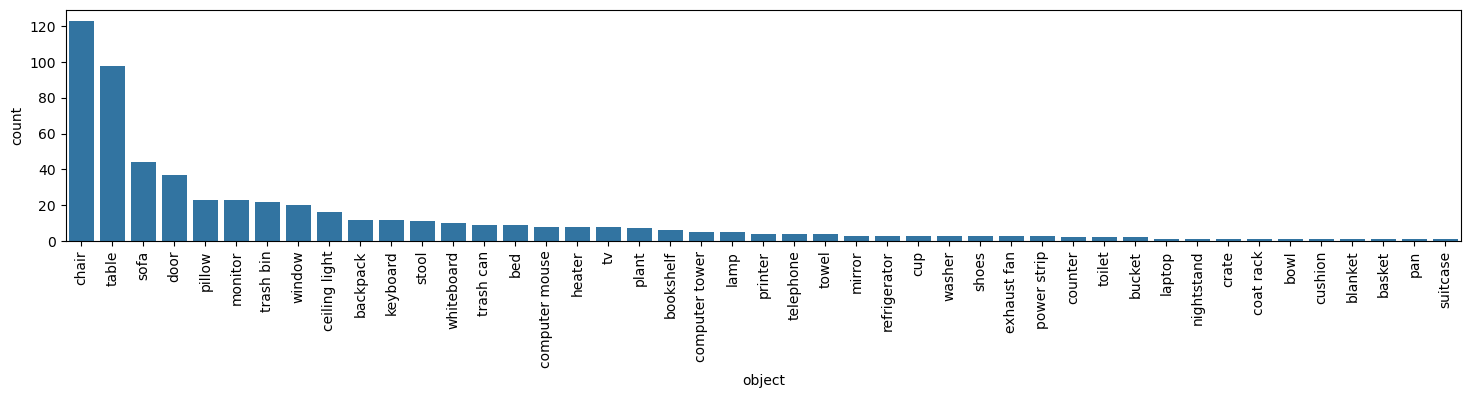

In [10]:
# visualize the distribution of objects
plt.figure(figsize=(18, 3))

sns.countplot(data=qdf, x="object", order=qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

In [11]:
qdf.iloc[0]

id                                                           0
dataset                                            arkitscenes
scene_name                                            41069025
question_type                                  object_counting
question                   How many table(s) are in this room?
ground_truth                                                 4
options                                                   None
bld_sims_3q_10k_blind                                      0.0
blk_sims_3q_10k_blind                                      0.0
cambrian-s                                                 0.1
cambrian-s_blind                                           0.1
gemini-1.5_pro                                             0.1
llava_vid_7b                                               0.1
llava_vid_7b_blind                                         0.0
qwen2.5_7b_blind                                           0.6
qwen2_7b_blind                                         

In [12]:
qdf["ground_truth"].value_counts()

ground_truth
2     302
3     104
4      58
5      30
6      15
7       9
8       8
10      5
9       5
12      4
18      3
17      3
11      2
16      2
27      2
25      2
36      2
14      2
38      1
22      1
47      1
1       1
19      1
40      1
23      1
Name: count, dtype: int64

In [13]:
# Convert ground_truth to numeric, coercing errors to NaN
qdf["ground_truth"] = pd.to_numeric(qdf["ground_truth"], errors="coerce")

# Get mean and std of each object gt
def get_obj_stats(df):
    df = df.copy()
    df["ground_truth"] = pd.to_numeric(df["ground_truth"], errors="coerce")
    agg_df = df.groupby("object")["ground_truth"].agg(["count", "mean", "std"]).reset_index().sort_values("mean").fillna(0)
    agg_df["ratio"] = agg_df["std"] / agg_df["mean"]
    return agg_df.sort_values("ratio", ascending=False)

obj_agg_df = get_obj_stats(qdf)
obj_agg_df

object  count      mean       std     ratio
11  computer tower      5  8.000000  9.823441  1.227930
8            chair    123  6.967480  8.517999  1.222537
31           shoes      3  4.666667  4.618802  0.989743
7    ceiling light     16  6.437500  6.196437  0.962553
19        keyboard     12  3.083333  2.466441  0.799927
35           table     98  3.183673  2.325772  0.730531
26          pillow     23  3.782609  2.746180  0.726001
23         monitor     23  4.652174  3.311258  0.711766
10  computer mouse      8  3.250000  2.052873  0.631653
4        bookshelf      6  2.666667  1.632993  0.612372
27           plant      7  3.285714  1.603567  0.488042
6           bucket      2  3.000000  1.414214  0.471405
44          window     20  2.650000  1.182103  0.446077
39       trash bin     22  2.545455  1.100964  0.432521
38           towel      4  2.750000  0.957427  0.348155
30    refrigerator      3  1.666667  0.577350  0.346410
16            door     37  2.513514  0.869918  0.346096
18          heater      8  2.500000  0.755929  0.302372
32            sofa     44  2.409091  0.725553  0.301173
33           stool     11  2.272727  0.646670  0.284535
43      whiteboard     10  2.700000  0.674949  0.249981
22          mirror      3  2.333333  0.577350  0.247436
17     exhaust fan      3  2.333333  0.577350  0.247436
29         printer      4  2.250000  0.500000  0.222222
14             cup      3  2.666667  0.577350  0.216506
40       trash can      9  2.444444  0.527046  0.215610
20            lamp      5  2.200000  0.447214  0.203279
0         backpack     12  2.166667  0.389249  0.179654
24      nightstand      1  2.000000  0.000000  0.000000
41              tv      8  2.000000  0.000000  0.000000
37          toilet      2  2.000000  0.000000  0.000000
2              bed      9  2.000000  0.000000  0.000000
15         cushion      1  6.000000  0.000000  0.000000
5             bowl      1  2.000000  0.000000  0.000000
36       telephone      4  2.000000  0.000000  0.000000
1           basket      1  4.000000  0.000000  0.000000
12         counter      2  2.000000  0.000000  0.000000
21          laptop      1  2.000000  0.000000  0.000000
9        coat rack      1  2.000000  0.000000  0.000000
25             pan      1  2.000000  0.000000  0.000000
28     power strip      3  2.000000  0.000000  0.000000
3          blanket      1  3.000000  0.000000  0.000000
34        suitcase      1  3.000000  0.000000  0.000000
42          washer      3  2.000000  0.000000  0.000000
13           crate      1  9.000000  0.000000  0.000000

In [14]:
qdf.loc[qdf["object"] == "bed"]

id      dataset    scene_name    question_type  \
28      29  arkitscenes      42446517  object_counting   
47      48  arkitscenes      42898581  object_counting   
122    123  arkitscenes      47332886  object_counting   
4405  4425      scannet  scene0645_00  object_counting   
4418  4438      scannet  scene0648_00  object_counting   
4454  4474      scannet  scene0697_01  object_counting   
4468  4488      scannet  scene0435_02  object_counting   
4567  4587      scannet  scene0221_01  object_counting   
4573  4593      scannet  scene0222_01  object_counting   

                               question  ground_truth options  \
28    How many bed(s) are in this room?             2    None   
47    How many bed(s) are in this room?             2    None   
122   How many bed(s) are in this room?             2    None   
4405  How many bed(s) are in this room?             2    None   
4418  How many bed(s) are in this room?             2    None   
4454  How many bed(s) are in this room?             2    None   
4468  How many bed(s) are in this room?             2    None   
4567  How many bed(s) are in this room?             2    None   
4573  How many bed(s) are in this room?             2    None   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  \
28                      0.1                    0.1         1.0   
47                      0.1                    0.1         1.0   
122                     0.1                    0.1         1.0   
4405                    0.1                    0.1         1.0   
4418                    0.1                    0.1         1.0   
4454                    0.1                    0.1         1.0   
4468                    0.1                    0.1         1.0   
4567                    0.1                    0.1         1.0   
4573                    0.1                    0.1         1.0   

      cambrian-s_blind  gemini-1.5_pro  llava_vid_7b  llava_vid_7b_blind  \
28                 1.0             1.0           1.0                 0.1   
47                 1.0             1.0           0.1                 0.1   
122                1.0             1.0           1.0                 0.1   
4405               1.0             1.0           0.1                 0.1   
4418               1.0             1.0           1.0                 0.1   
4454               1.0             1.0           0.1                 0.1   
4468               1.0             1.0           1.0                 0.1   
4567               1.0             1.0           1.0                 0.1   
4573               1.0             1.0           1.0                 0.1   

      qwen2.5_7b_blind  qwen2_7b_blind  rgb_sims_3q_10k_blind  \
28                 0.1             1.0                    0.1   
47                 0.1             1.0                    0.1   
122                0.1             1.0                    0.1   
4405               0.1             1.0                    0.1   
4418               0.1             1.0                    0.1   
4454               0.1             1.0                    0.1   
4468               0.1             1.0                    0.1   
4567               0.1             1.0                    0.1   
4573               0.1             1.0                    0.1   

      rgb_sims_3q_25k  rgb_sims_3q_25k_blind  rgb_sims_manV2_5k  \
28                1.0                    0.1                1.0   
47                0.1                    0.1                0.1   
122               1.0                    0.1                1.0   
4405              0.1                    0.1                1.0   
4418              0.1                    0.1                1.0   
4454              0.1                    0.1                1.0   
4468              1.0                    0.1                1.0   
4567              1.0                    0.1                1.0   
4573              0.1                    0.1                0.1   

      rgb_sims_manV2_5k_blind  v

In [15]:
obj_agg_df[abs(obj_agg_df["ratio"]) < 0.2].sort_values("ratio", ascending=False)

object  count      mean       std     ratio
0      backpack     12  2.166667  0.389249  0.179654
24   nightstand      1  2.000000  0.000000  0.000000
42       washer      3  2.000000  0.000000  0.000000
34     suitcase      1  3.000000  0.000000  0.000000
3       blanket      1  3.000000  0.000000  0.000000
28  power strip      3  2.000000  0.000000  0.000000
25          pan      1  2.000000  0.000000  0.000000
9     coat rack      1  2.000000  0.000000  0.000000
21       laptop      1  2.000000  0.000000  0.000000
12      counter      2  2.000000  0.000000  0.000000
1        basket      1  4.000000  0.000000  0.000000
36    telephone      4  2.000000  0.000000  0.000000
5          bowl      1  2.000000  0.000000  0.000000
15      cushion      1  6.000000  0.000000  0.000000
2           bed      9  2.000000  0.000000  0.000000
37       toilet      2  2.000000  0.000000  0.000000
41           tv      8  2.000000  0.000000  0.000000
13        crate      1  9.000000  0.000000  0.000000

In [16]:
len(qdf)

565

In [17]:
pd.set_option('display.max_rows', 100)
budget = 200
budget = 150
budget = 262

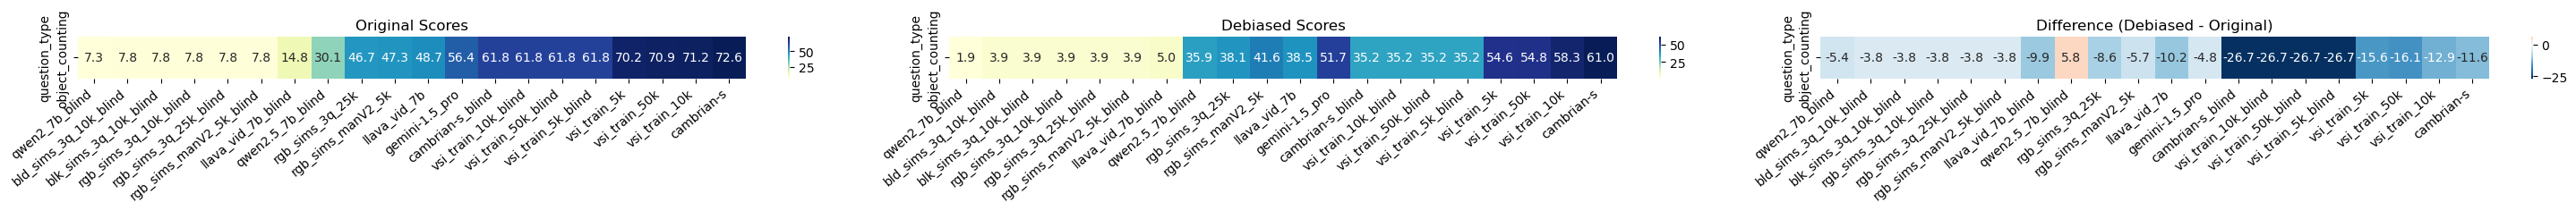

In [18]:
ids = dv.filter_object_counting(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

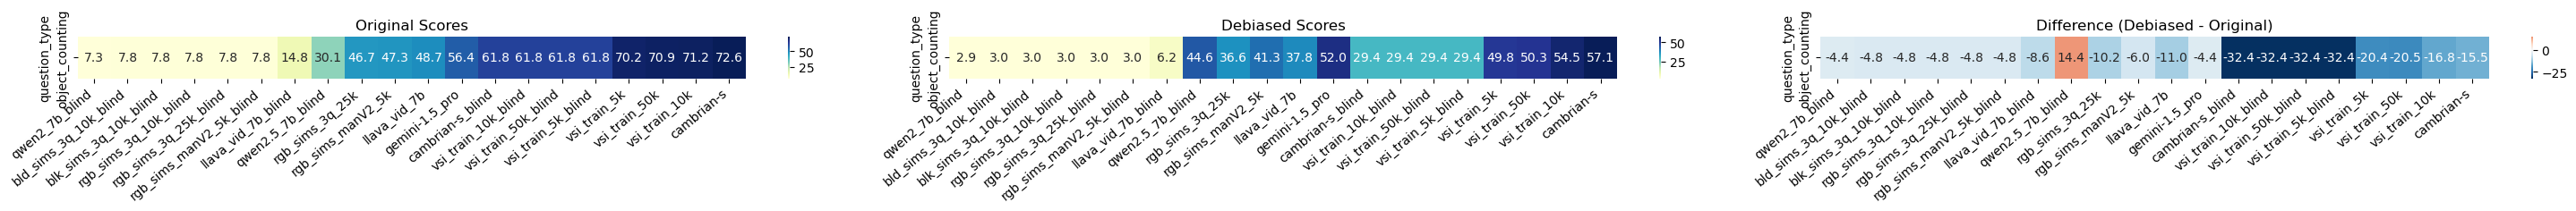

In [19]:
ids = dv.filter_object_counting_scored(qdf, budget=budget, w_combo_freq=3)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

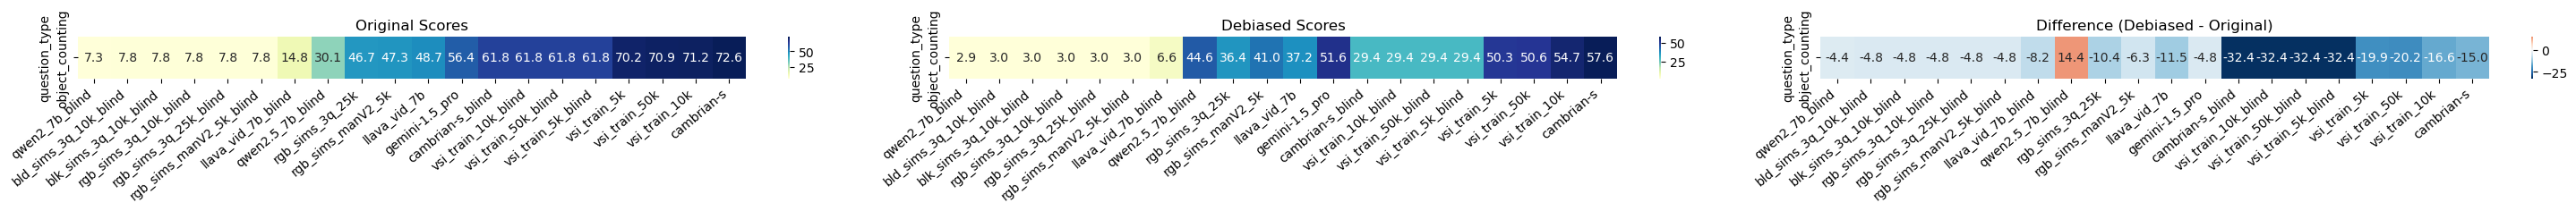

In [20]:
ids = dv.filter_object_counting_scored(qdf, budget=budget, w_obj_freq=0, w_val_freq=1, w_combo_freq=1)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

w_obj_freq: 0, w_val_freq: 1, w_combo_freq: 0
w_obj_freq: 0, w_val_freq: 1, w_combo_freq: 1
w_obj_freq: 1, w_val_freq: 3, w_combo_freq: 2
w_obj_freq: 1, w_val_freq: 5, w_combo_freq: 3
w_obj_freq: 2, w_val_freq: 5, w_combo_freq: 3


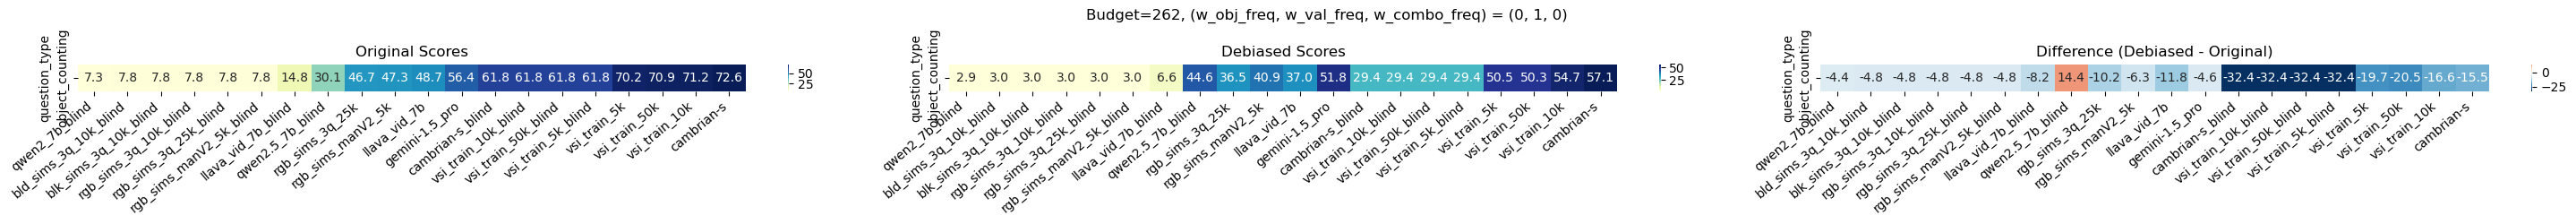

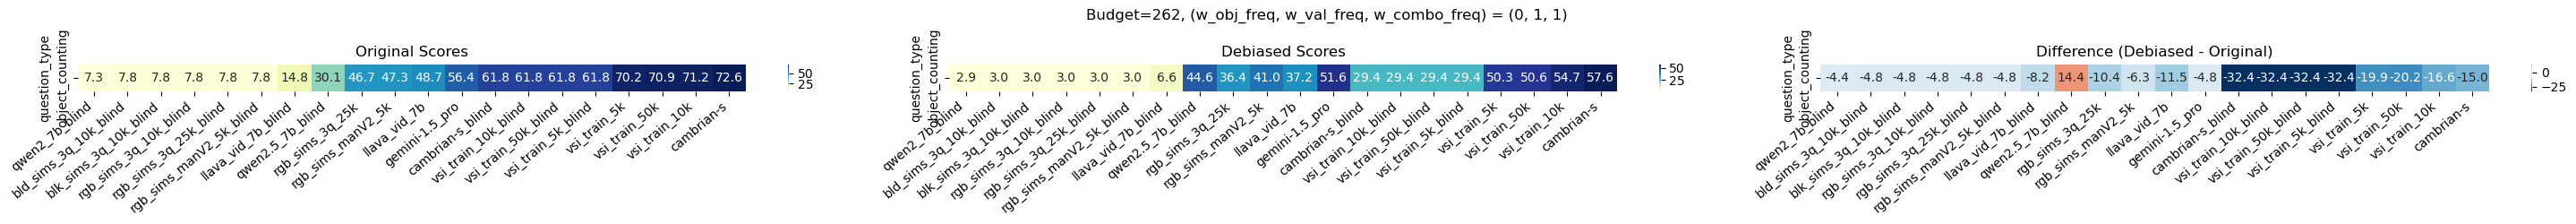

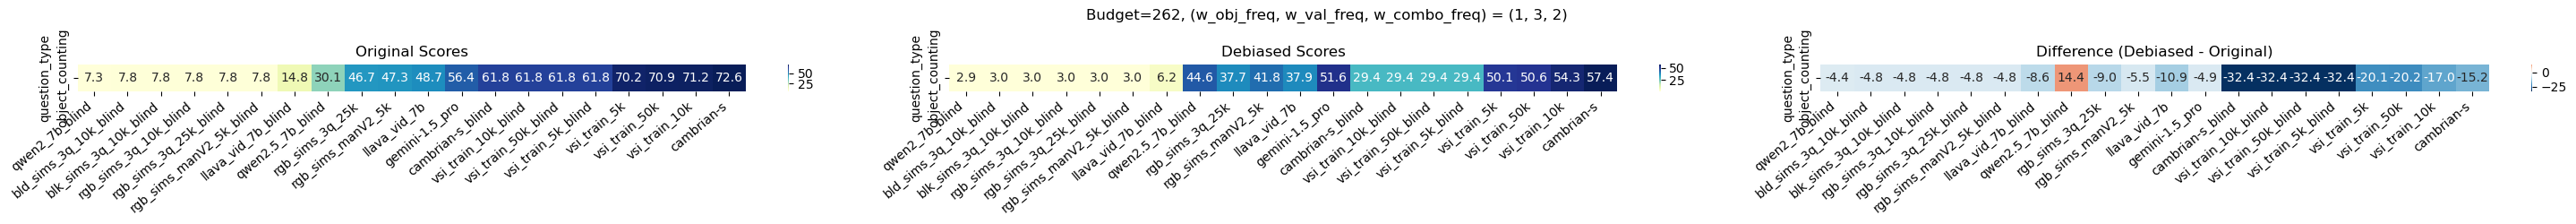

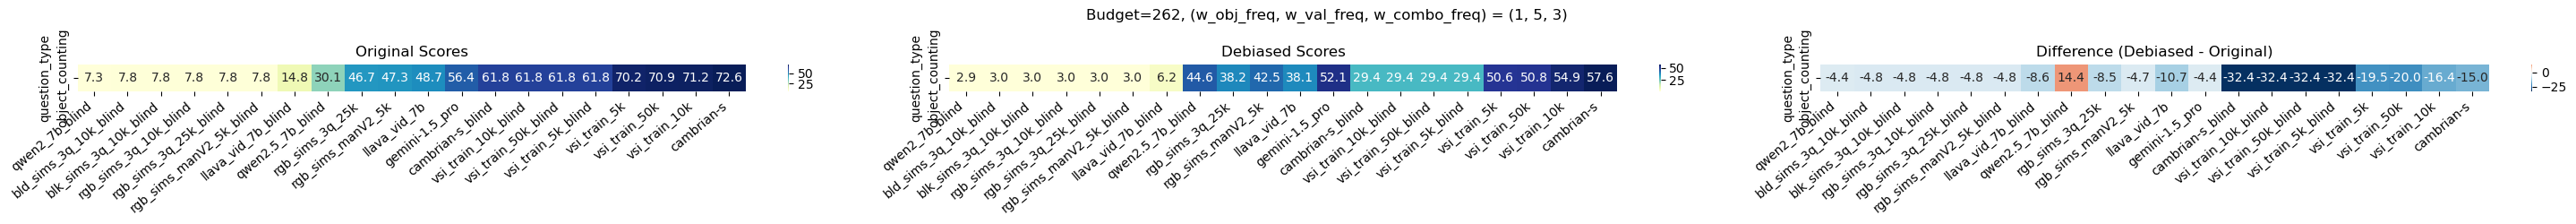

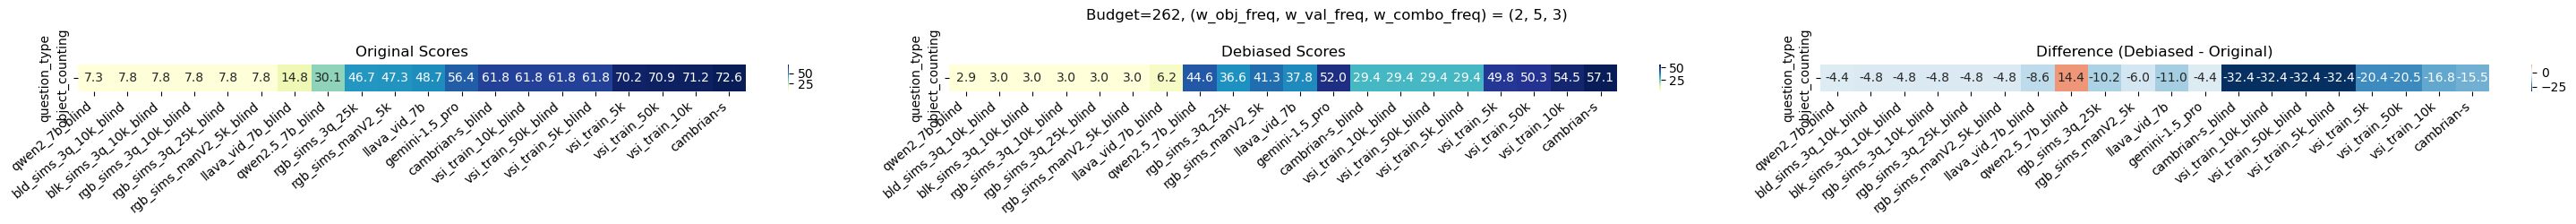

In [21]:
for w_obj_freq, w_val_freq, w_combo_freq in [
        # (0, 0, 1),
        (0, 1, 0),  # second best
        # (1, 0, 0),
        # (1, 1, 0),
        # (1, 0, 1),
        (0, 1, 1),  # best
        # (1, 1, 1),
        #
        (1, 3, 2),
        (1, 5, 3),
        (2, 5, 3),
    ]:
    print(f"w_obj_freq: {w_obj_freq}, w_val_freq: {w_val_freq}, w_combo_freq: {w_combo_freq}")
    ids = dv.filter_object_counting_scored(qdf, budget=budget, w_obj_freq=w_obj_freq, w_val_freq=w_val_freq, w_combo_freq=w_combo_freq)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"Budget={budget}, (w_obj_freq, w_val_freq, w_combo_freq) = ({w_obj_freq}, {w_val_freq}, {w_combo_freq})");


w_obj_freq: 0, w_val_freq: 0, w_combo_freq: 1
w_obj_freq: 0, w_val_freq: 1, w_combo_freq: 0
w_obj_freq: 1, w_val_freq: 0, w_combo_freq: 0
w_obj_freq: 1, w_val_freq: 1, w_combo_freq: 0
w_obj_freq: 1, w_val_freq: 0, w_combo_freq: 1
w_obj_freq: 0, w_val_freq: 1, w_combo_freq: 1
w_obj_freq: 1, w_val_freq: 1, w_combo_freq: 1


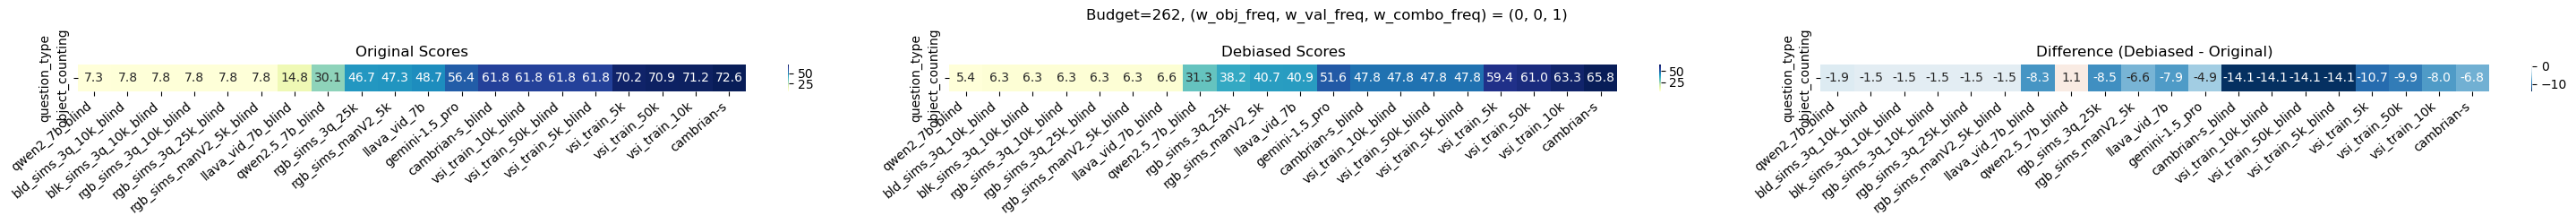

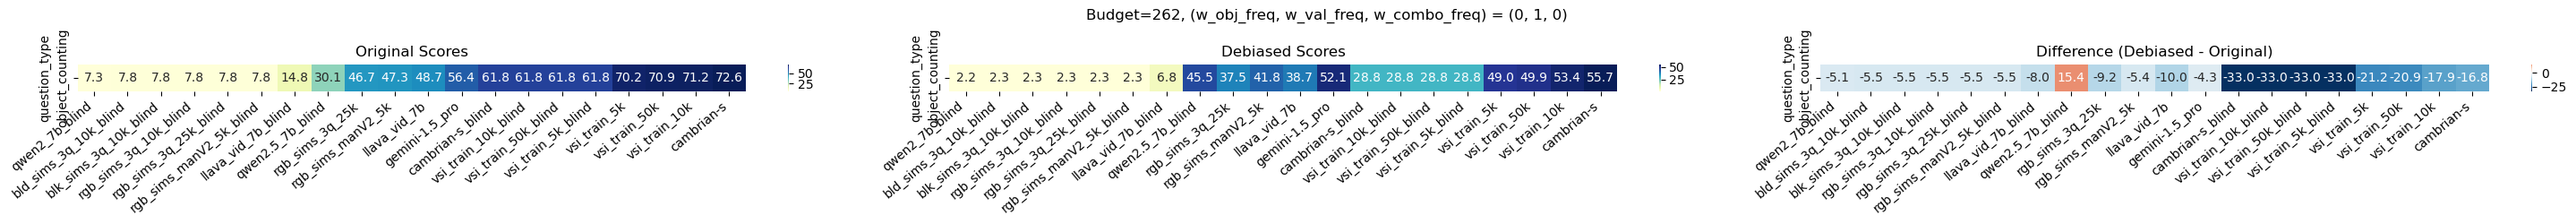

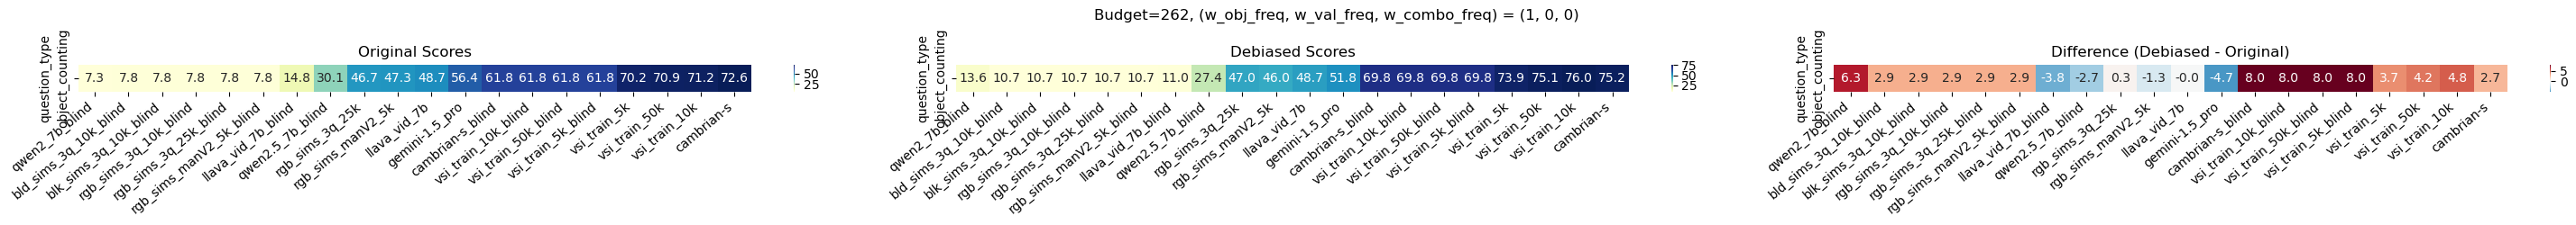

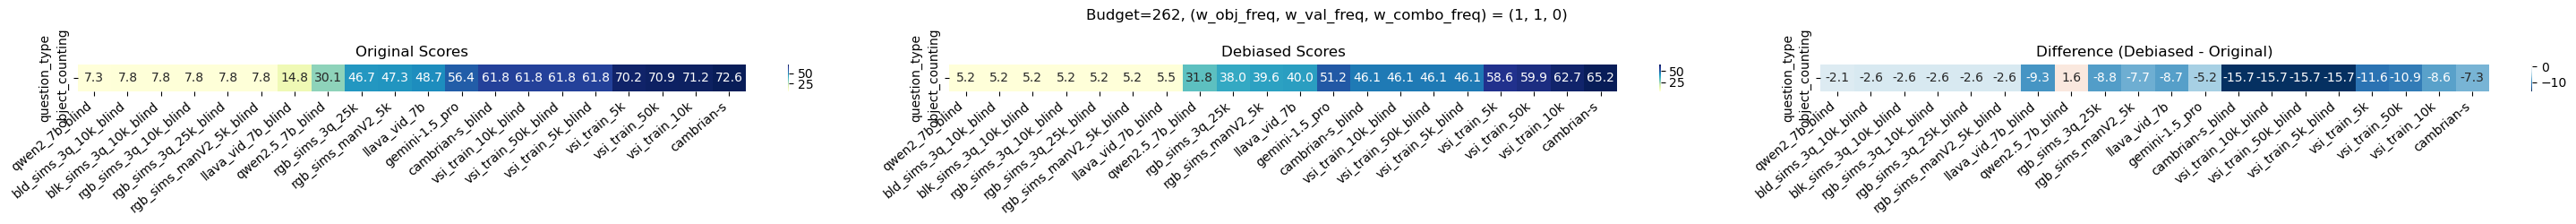

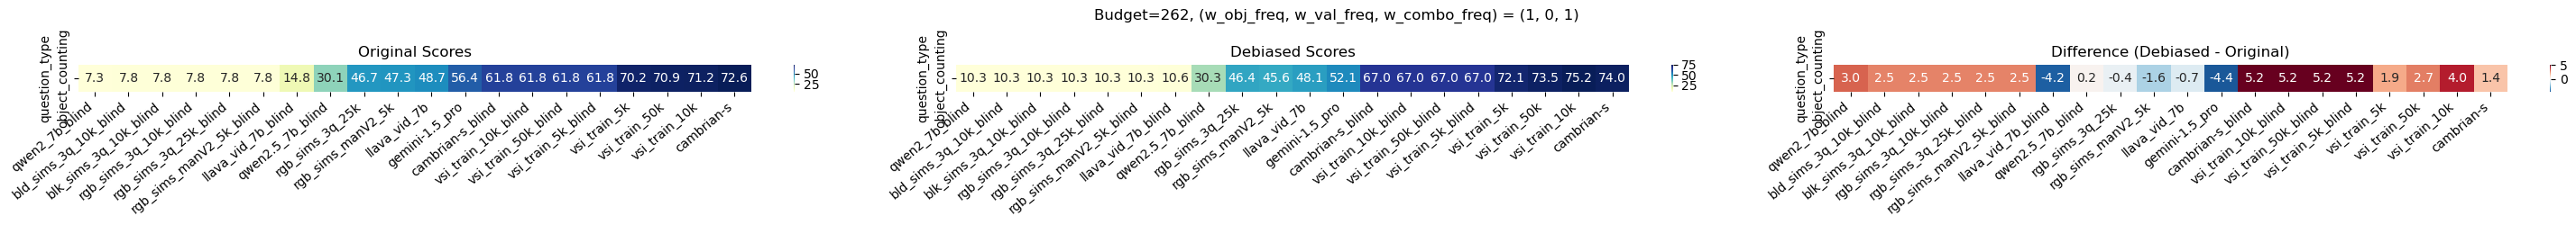

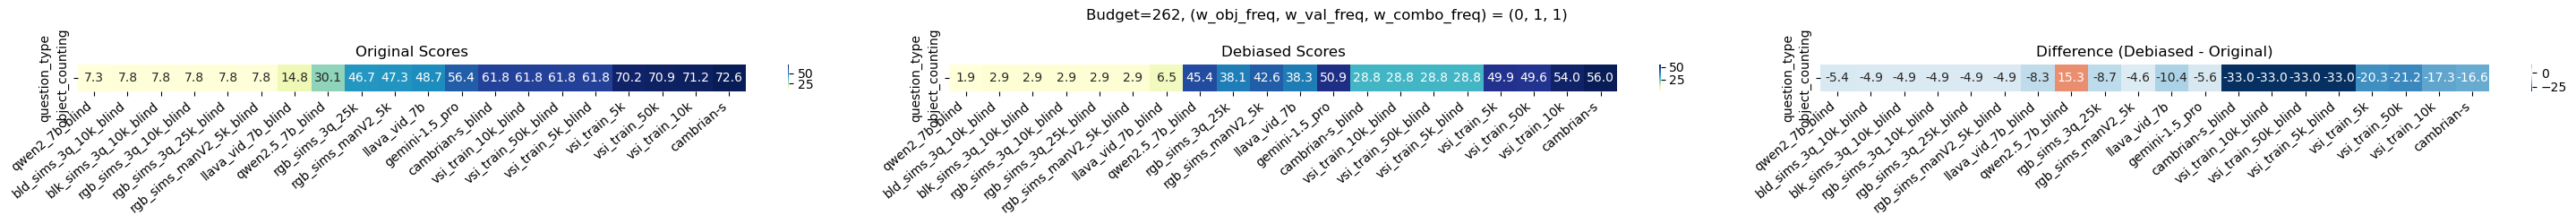

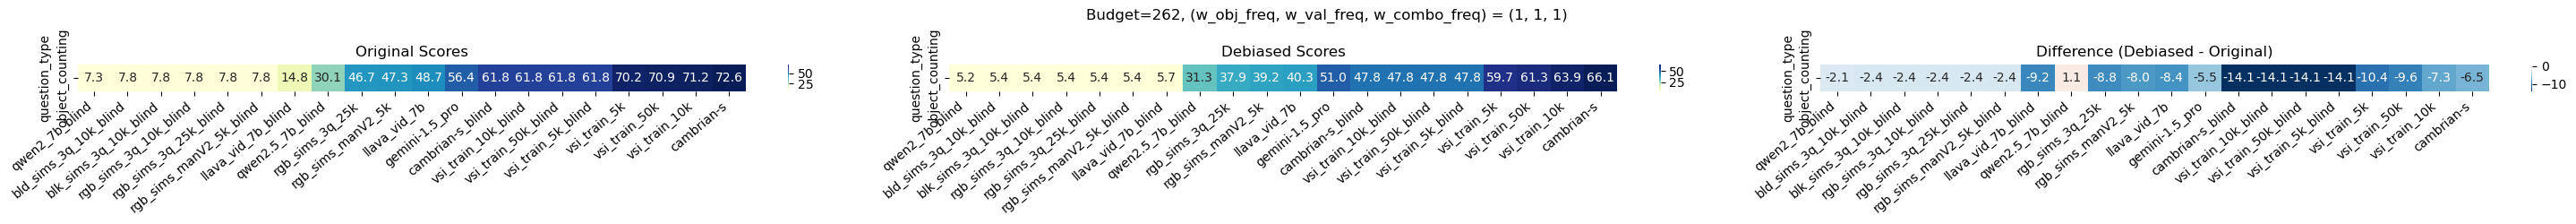

In [22]:
for w_obj_freq, w_val_freq, w_combo_freq in [
        (0, 0, 1),
        (0, 1, 0),  # second best
        (1, 0, 0),
        (1, 1, 0),
        (1, 0, 1),
        (0, 1, 1),  # best
        (1, 1, 1),
    ]:
    print(f"w_obj_freq: {w_obj_freq}, w_val_freq: {w_val_freq}, w_combo_freq: {w_combo_freq}")
    ids = dv.filter_object_counting_scored_v2(qdf, budget=budget, w_obj_freq=w_obj_freq, w_val_freq=w_val_freq, w_combo_freq=w_combo_freq)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"Budget={budget}, (w_obj_freq, w_val_freq, w_combo_freq) = ({w_obj_freq}, {w_val_freq}, {w_combo_freq})");


w_obj_freq: 1, w_val_freq: 1, w_combo_freq: 1, min_samples_per_gt: 1, min_samples_per_obj: 1
w_obj_freq: 0, w_val_freq: 1, w_combo_freq: 1, min_samples_per_gt: 1, min_samples_per_obj: 1
w_obj_freq: 0, w_val_freq: 5, w_combo_freq: 1, min_samples_per_gt: 3, min_samples_per_obj: 3


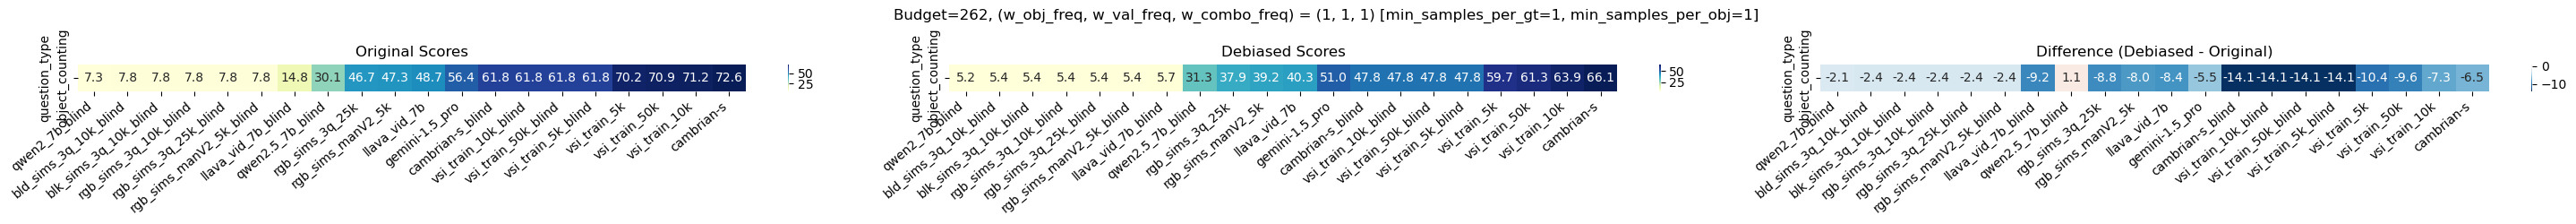

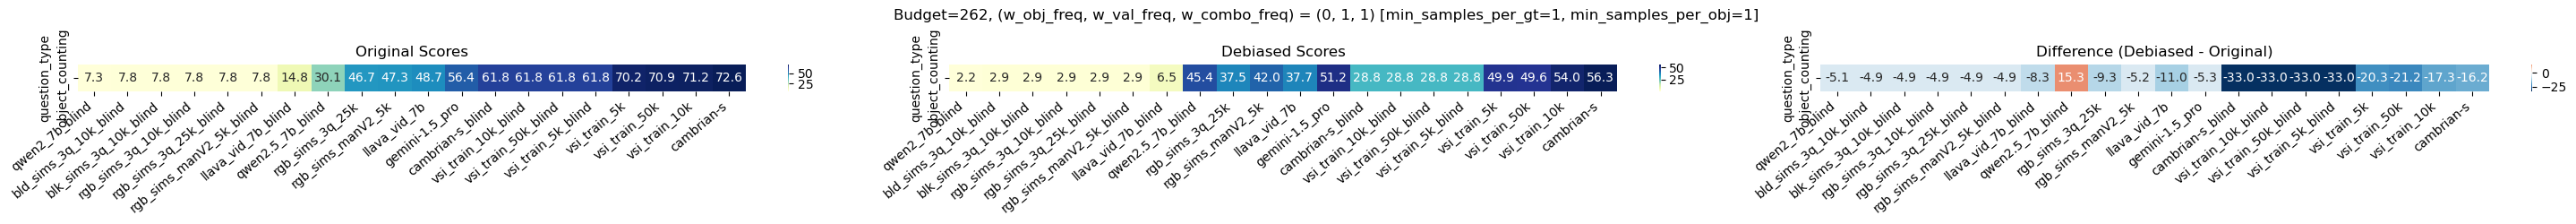

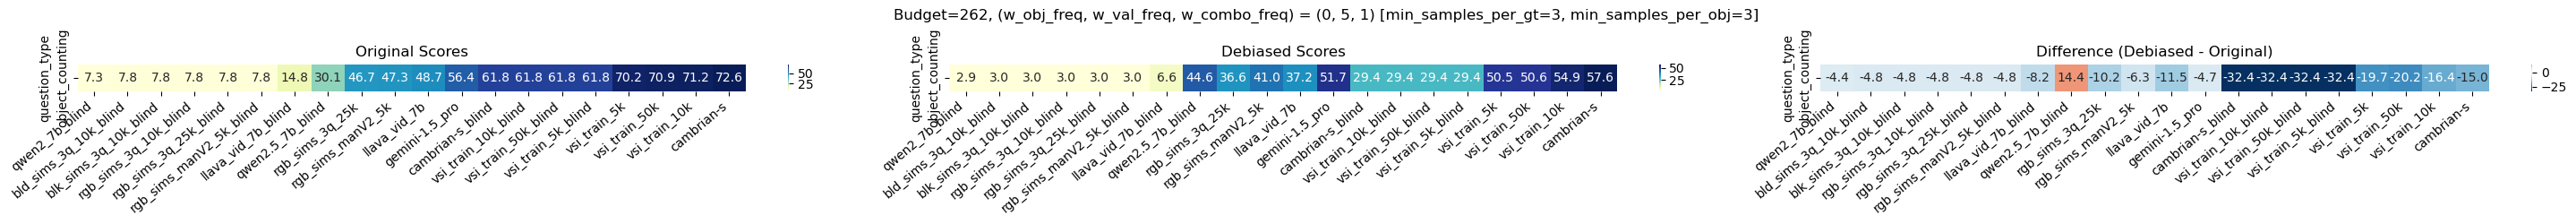

In [23]:
for w_obj_freq, w_val_freq, w_combo_freq, min_samples_per_gt, min_samples_per_obj in [
        (1, 1, 1, 1, 1),
        (0, 1, 1, 1, 1),
        (0, 5, 1, 3, 3),
    ]:
    print(f"w_obj_freq: {w_obj_freq}, w_val_freq: {w_val_freq}, w_combo_freq: {w_combo_freq}, min_samples_per_gt: {min_samples_per_gt}, min_samples_per_obj: {min_samples_per_obj}")
    ids = dv.filter_object_counting_scored_v2(qdf, budget=budget, w_obj_freq=w_obj_freq, w_val_freq=w_val_freq, w_combo_freq=w_combo_freq, min_samples_per_gt=min_samples_per_gt, min_samples_per_obj=min_samples_per_obj)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"Budget={budget}, (w_obj_freq, w_val_freq, w_combo_freq) = ({w_obj_freq}, {w_val_freq}, {w_combo_freq}) [min_samples_per_gt={min_samples_per_gt}, min_samples_per_obj={min_samples_per_obj}]");


w_obj_freq: 1, w_combo_freq: 0
Starting counts: {'2': 302, '3': 104, '4': 58, '5': 30, '6': 15, '7': 9, '8': 8, '10': 5, '9': 5, '12': 4, '18': 3, '17': 3, '11': 2, '16': 2, '27': 2, '25': 2, '36': 2, '14': 2, '38': 1, '22': 1, '47': 1, '1': 1, '19': 1, '40': 1, '23': 1}
Removed 10/320. 	Current pcts: {'2': '52.7%', '3': '18.7%', '4': '10.4%', '5': '5.4%', '6': '2.7%', '7': '1.6%', '8': '1.4%', '10': '0.9%', '9': '0.9%', '12': '0.7%', '18': '0.5%', '17': '0.5%', '11': '0.4%', '16': '0.4%', '27': '0.4%', '25': '0.4%', '36': '0.4%', '14': '0.4%', '38': '0.2%', '22': '0.2%', '47': '0.2%', '1': '0.2%', '19': '0.2%', '40': '0.2%', '23': '0.2%'}
Removed 20/320. 	Current pcts: {'2': '51.8%', '3': '19.0%', '4': '10.6%', '5': '5.5%', '6': '2.7%', '7': '1.6%', '8': '1.5%', '10': '0.9%', '9': '0.9%', '12': '0.7%', '18': '0.5%', '17': '0.5%', '11': '0.4%', '16': '0.4%', '27': '0.4%', '25': '0.4%', '36': '0.4%', '14': '0.4%', '38': '0.2%', '22': '0.2%', '47': '0.2%', '1': '0.2%', '19': '0.2%', '40'

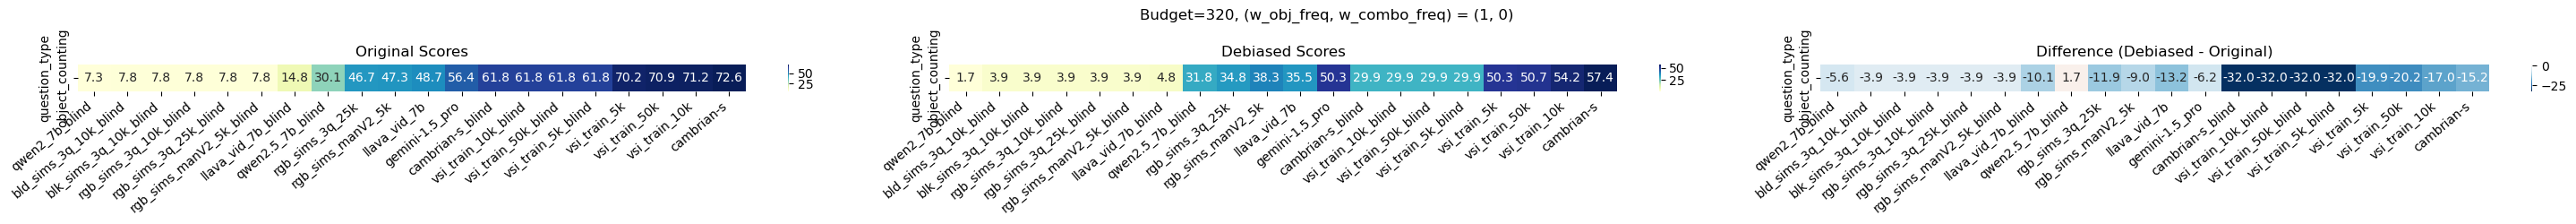

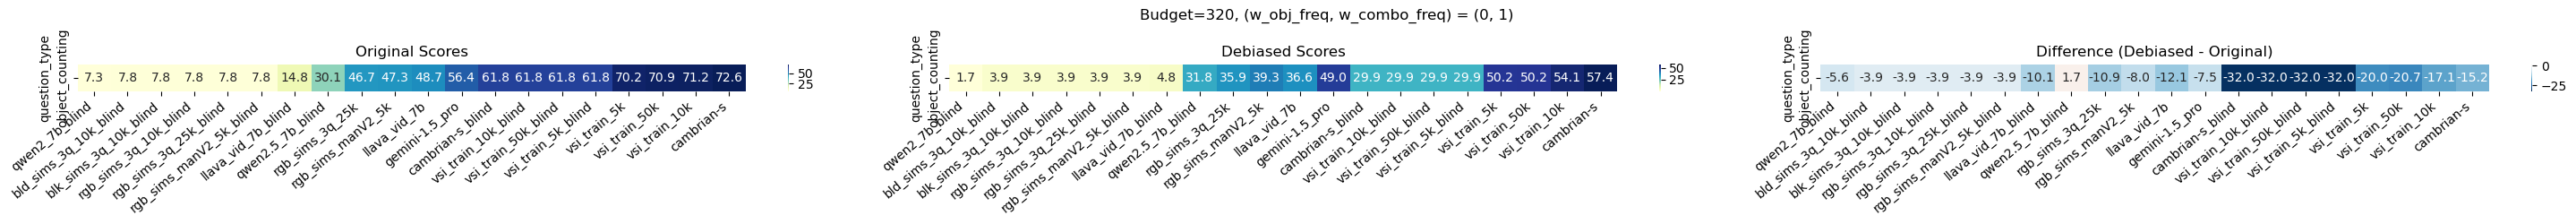

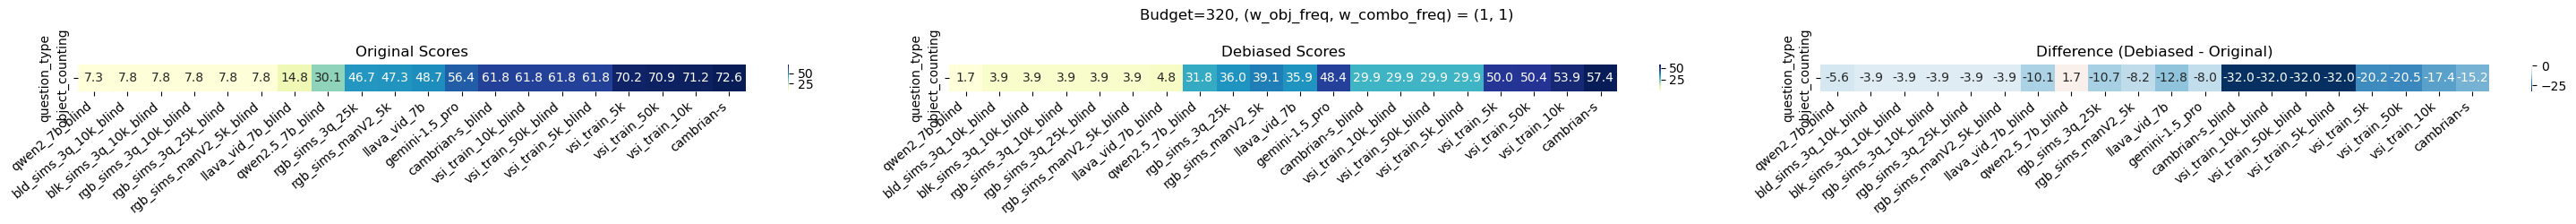

In [24]:
budget = 320
# budget = 300

for w_obj_freq, w_combo_freq in [
        (1, 0),
        (0, 1),
        (1, 1),
    ]:
    print(f"w_obj_freq: {w_obj_freq}, w_combo_freq: {w_combo_freq}")
    ids = dv.filter_object_counting_dynamic_pct(qdf, budget=budget, w_obj_freq=w_obj_freq, w_combo_freq=w_combo_freq, verbose=True)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"Budget={budget}, (w_obj_freq, w_combo_freq) = ({w_obj_freq}, {w_combo_freq})");


In [25]:
print("Debiased object size estimation rows")
get_obj_stats(qdf.loc[qdf["id"].isin(ids)]).sort_values("count", ascending=False)

Debiased object size estimation rows


object  count      mean       std     ratio
12          table     75  2.280000  0.452022  0.198255
4           chair     60  2.600000  0.717812  0.276082
10           sofa     40  2.225000  0.422902  0.190068
5            door     29  2.137931  0.350931  0.164145
13      trash bin     16  2.000000  0.000000  0.000000
17         window     12  2.000000  0.000000  0.000000
9          pillow     10  2.000000  0.000000  0.000000
0        backpack     10  2.000000  0.000000  0.000000
1             bed      9  2.000000  0.000000  0.000000
7        keyboard      9  2.000000  0.000000  0.000000
11          stool      9  2.000000  0.000000  0.000000
15             tv      8  2.000000  0.000000  0.000000
8         monitor      6  2.000000  0.000000  0.000000
6          heater      5  2.000000  0.000000  0.000000
14      trash can      5  2.000000  0.000000  0.000000
3   ceiling light      5  2.000000  0.000000  0.000000
16     whiteboard      4  2.000000  0.000000  0.000000
2       bookshelf      2  2.000000  0.000000  0.000000

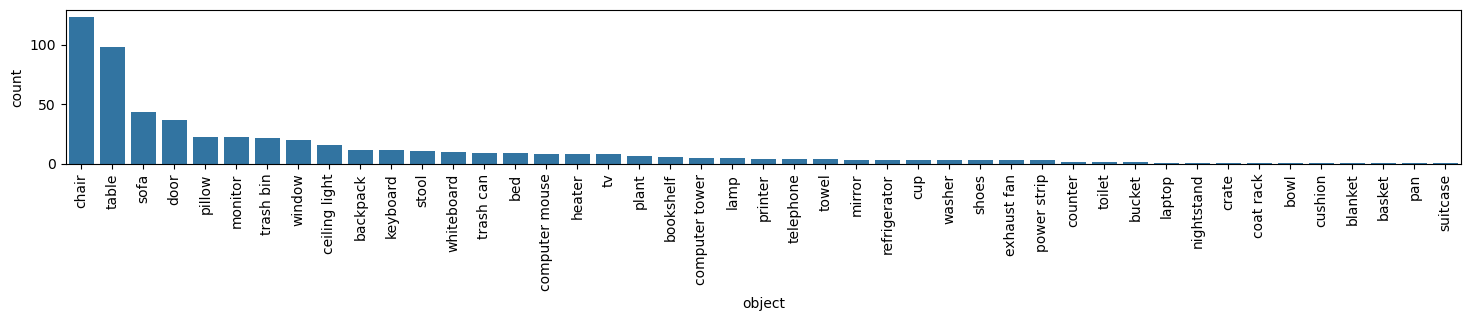

In [26]:
# visualize the distribution of objects
plt.figure(figsize=(18, 2))

sns.countplot(data=qdf, x="object", order=qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

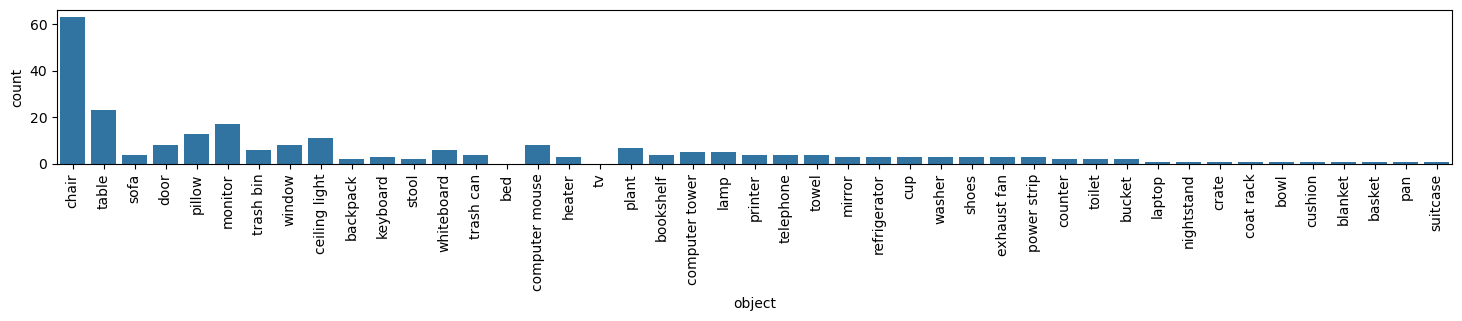

In [27]:
# visualize the distribution of objects
plt.figure(figsize=(18, 2))

sns.countplot(data=deb_qdf, x="object", order=qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

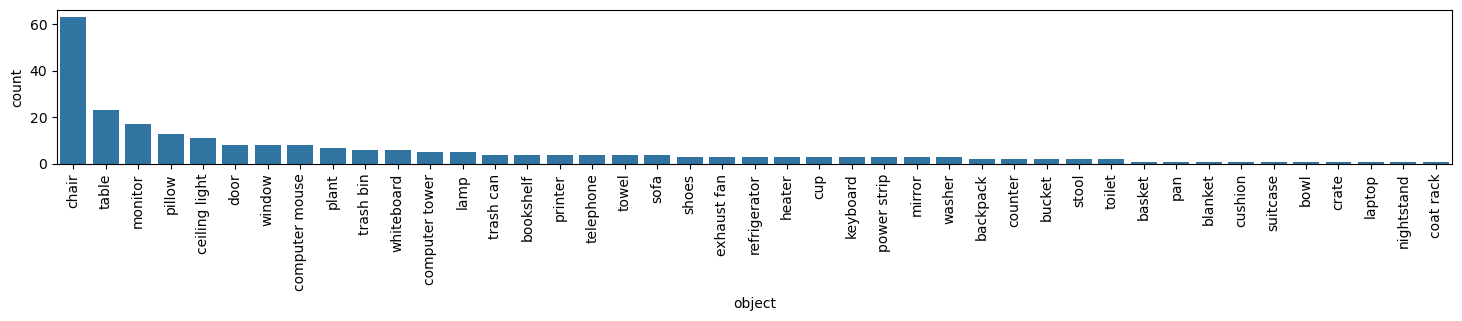

In [28]:
# visualize the distribution of objects
plt.figure(figsize=(18, 2))

sns.countplot(data=deb_qdf, x="object", order=deb_qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

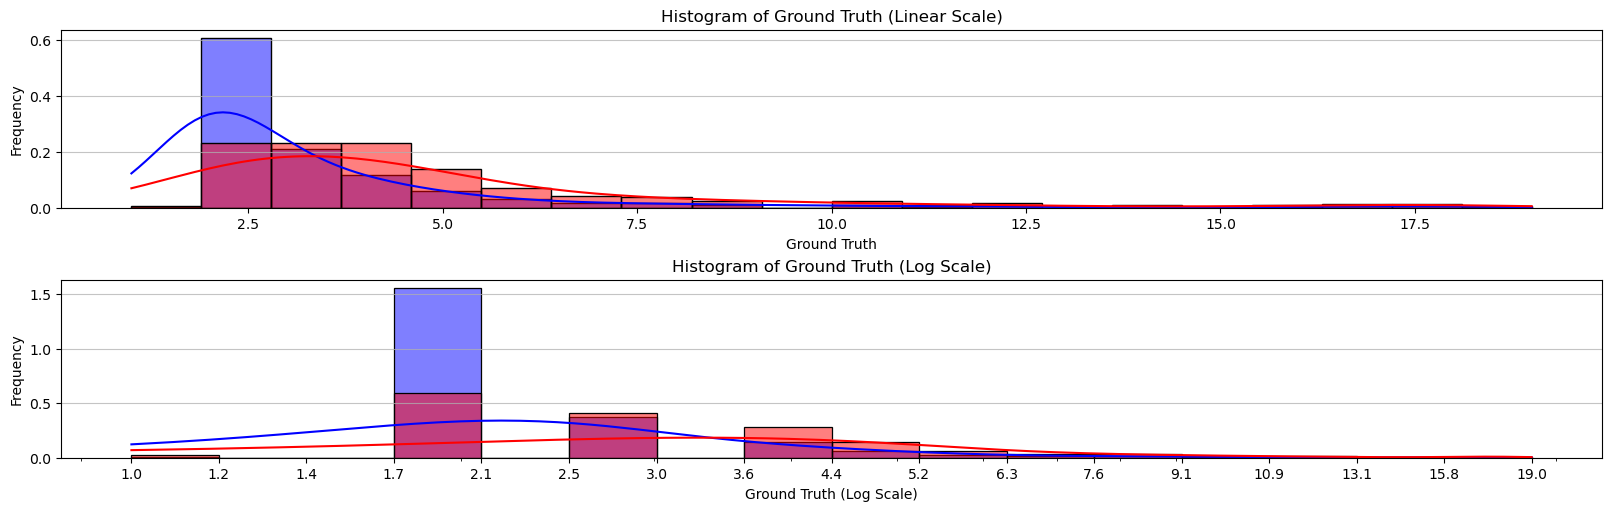

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), constrained_layout=True)

# First plot: Linear scale
qdf['ground_truth_num'] = pd.to_numeric(qdf['ground_truth'], errors='coerce')  # Convert to numeric if possible
gt_series = qdf['ground_truth_num'].dropna()
deb_gt_series = deb_qdf['ground_truth_num'].dropna()

max_val = 20
# subset series to max_val
gt_series = gt_series[gt_series <= max_val]
deb_gt_series = deb_gt_series[deb_gt_series <= max_val]

sns.histplot(gt_series, bins=20, kde=True, color='blue', edgecolor='black', ax=axes[0], stat='density')
sns.histplot(deb_gt_series, bins=20, kde=True, color='red', edgecolor='black', ax=axes[0], stat='density')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ground Truth (Linear Scale)')
axes[0].grid(axis='y', alpha=0.75)

# Second plot: Log scale
bins = np.logspace(np.log10(gt_series.min()), np.log10(gt_series.max()), 17)
sns.histplot(gt_series, bins=bins, kde=True, color='blue', edgecolor='black', ax=axes[1], stat='density')
sns.histplot(deb_gt_series, bins=bins, kde=True, color='red', edgecolor='black', ax=axes[1], stat='density')
axes[1].set_xscale('log')
axes[1].set_xlabel('Ground Truth (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Ground Truth (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# Set x-ticks for the log scale plot
ticks = bins
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f"{tick:.1f}" for tick in ticks])

plt.show()


In [30]:
deb_qdf["ground_truth"].value_counts()

ground_truth
4     50
2     50
3     50
5     30
6     15
7      9
8      8
10     5
9      5
12     4
18     3
17     3
11     2
16     2
27     2
25     2
36     2
14     2
38     1
22     1
47     1
1      1
19     1
40     1
23     1
Name: count, dtype: int64

In [31]:
get_obj_stats(deb_qdf).sort_values("count", ascending=False)

object  count       mean        std     ratio
7            chair     63  11.126984  10.307360  0.926339
34           table     23   6.130435   3.361606  0.548347
22         monitor     17   5.588235   3.392249  0.607034
25          pillow     13   5.153846   3.023413  0.586632
6    ceiling light     11   8.454545   6.578201  0.778067
42          window      8   3.625000   1.407886  0.388382
9   computer mouse      8   3.250000   2.052873  0.631653
15            door      8   3.875000   0.834523  0.215361
26           plant      7   3.285714   1.603567  0.488042
41      whiteboard      6   3.166667   0.408248  0.128921
38       trash bin      6   4.000000   1.264911  0.316228
10  computer tower      5   8.000000   9.823441  1.227930
19            lamp      5   2.200000   0.447214  0.203279
37           towel      4   2.750000   0.957427  0.348155
35       telephone      4   2.000000   0.000000  0.000000
28         printer      4   2.250000   0.500000  0.222222
3        bookshelf      4   3.000000   2.000000  0.666667
31            sofa      4   4.250000   0.500000  0.117647
39       trash can      4   3.000000   0.000000  0.000000
27     power strip      3   2.000000   0.000000  0.000000
21          mirror      3   2.333333   0.577350  0.247436
16     exhaust fan      3   2.333333   0.577350  0.247436
13             cup      3   2.666667   0.577350  0.216506
18        keyboard      3   6.333333   3.511885  0.554508
30           shoes      3   4.666667   4.618802  0.989743
17          heater      3   3.333333   0.577350  0.173205
40          washer      3   2.000000   0.000000  0.000000
29    refrigerator      3   1.666667   0.577350  0.346410
0         backpack      2   3.000000   0.000000  0.000000
36          toilet      2   2.000000   0.000000  0.000000
11         counter      2   2.000000   0.000000  0.000000
32           stool      2   3.500000   0.707107  0.202031
5           bucket      2   3.000000   1.414214  0.471405
24             pan      1   2.000000   0.000000  0.000000
8        coat rack      1   2.000000   0.000000  0.000000
14         cushion      1   6.000000   0.000000  0.000000
20          laptop      1   2.000000   0.000000  0.000000
12           crate      1   9.000000   0.000000  0.000000
4             bowl      1   2.000000   0.000000  0.000000
2          blanket      1   3.000000   0.000000  0.000000
1           basket      1   4.000000   0.000000  0.000000
33        suitcase      1   3.000000   0.000000  0.000000
23      nightstand      1   2.000000   0.000000  0.000000

In [32]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
# pd.concat([a, b], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased"})
# pd.concat([a, b, c], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original"})
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}).T.sort_values("Difference")

Removed   Debiased   Original  Difference
vsi_train_5k_blind       87.388535  29.880478  61.840708  -31.960230
vsi_train_50k_blind      87.388535  29.880478  61.840708  -31.960230
cambrian-s_blind         87.388535  29.880478  61.840708  -31.960230
vsi_train_10k_blind      87.388535  29.880478  61.840708  -31.960230
vsi_train_50k            87.261146  50.358566  70.867257  -20.508691
vsi_train_5k             86.305732  50.000000  70.176991  -20.176991
vsi_train_10k            85.127389  53.864542  71.238938  -17.374396
cambrian-s               84.745223  57.370518  72.584071  -15.213553
llava_vid_7b             59.012739  35.896414  48.743363  -12.846948
rgb_sims_3q_25k          55.318471  35.976096  46.725664  -10.749568
llava_vid_7b_blind       22.866242   4.780876  14.831858  -10.050982
rgb_sims_manV2_5k        53.789809  39.083665  47.256637   -8.172972
gemini-1.5_pro           62.834395  48.446215  56.442478   -7.996263
qwen2_7b_blind           11.815287   1.673307   7.309735   -5.636428
bld_sims_3q_10k_blind    10.891720   3.864542   7.769912   -3.905370
rgb_sims_3q_25k_blind    10.891720   3.864542   7.769912   -3.905370
blk_sims_3q_10k_blind    10.891720   3.864542   7.769912   -3.905370
rgb_sims_manV2_5k_blind  10.891720   3.864542   7.769912   -3.905370
rgb_sims_3q_10k_blind    10.891720   3.864542   7.769912   -3.905370
qwen2.5_7b_blind         28.789809  31.832669  30.141593    1.691076

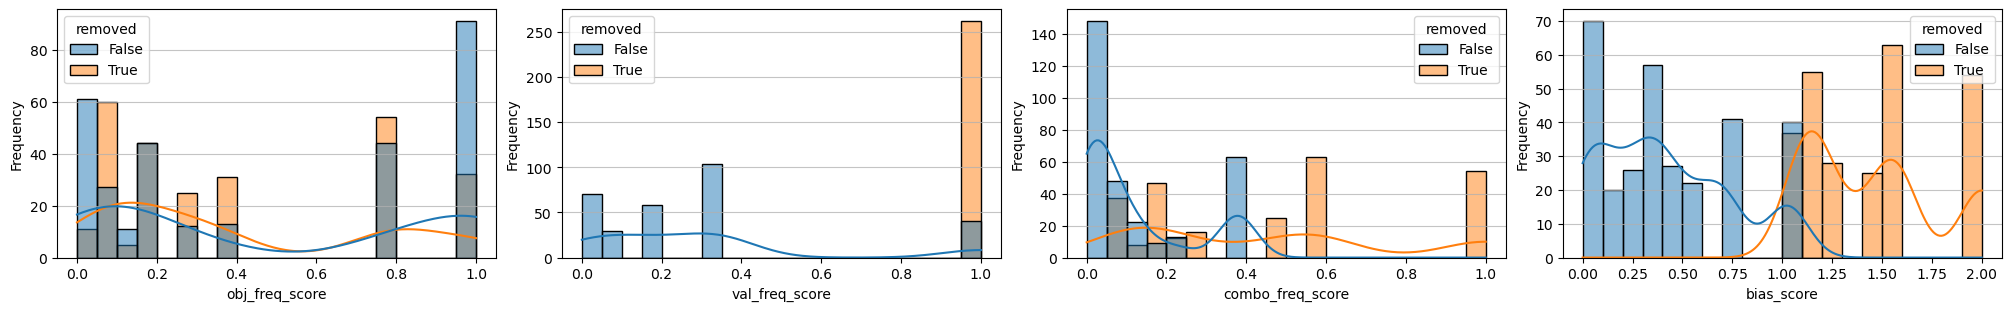

In [33]:
budget = 150
budget = 262

w_obj_freq = 0
w_val_freq = 1
w_combo_freq = 1

min_samples_per_gt = 3
min_samples_per_obj = 3

remove_ids = dv.filter_object_counting_scored_v2(qdf, budget=budget, w_obj_freq=w_obj_freq, w_val_freq=w_val_freq, w_combo_freq=w_combo_freq)
df_filtered = dv.get_object_counting_scores_v2(qdf, w_obj_freq=w_obj_freq, w_val_freq=w_val_freq, w_combo_freq=w_combo_freq)
df_sorted = df_filtered.sort_values("bias_score", ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)


scores = [
    # "bias_score",
    # "ground_truth_num",
    # "log_ground_truth_num",
    "obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score",
]

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, len(scores), figsize=(5*len(scores), 3), constrained_layout=True)
if len(scores) == 1:
    axes = [axes]  # Ensure axes is iterable even if there's only one score

for i, score in enumerate(scores):
    sns.histplot(data=df_sorted, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

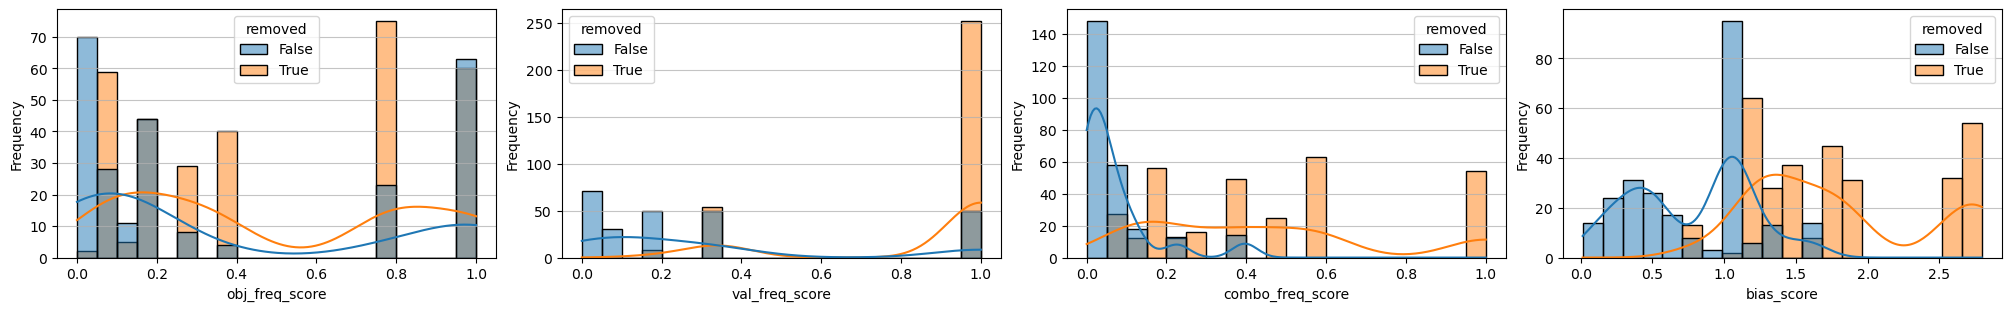

In [34]:
budget = 150
budget = 262
budget = 314

w_obj_freq = 1
w_combo_freq = 1

min_samples_per_gt = 3
min_samples_per_obj = 3

remove_ids = dv.filter_object_counting_dynamic_pct(qdf, budget=budget, w_obj_freq=w_obj_freq, w_combo_freq=w_combo_freq)
df_filtered = dv.get_object_counting_scores_v2(qdf, w_obj_freq=w_obj_freq, w_combo_freq=w_combo_freq)
# df_filtered = dv.get_object_counting_score_v3(qdf, w_obj_freq=w_obj_freq, w_combo_freq=w_combo_freq)
df_sorted = df_filtered.sort_values("bias_score", ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)


scores = [
    # "bias_score",
    # "ground_truth_num",
    # "log_ground_truth_num",
    "obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score",
]

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, len(scores), figsize=(5*len(scores), 3), constrained_layout=True)
if len(scores) == 1:
    axes = [axes]  # Ensure axes is iterable even if there's only one score

for i, score in enumerate(scores):
    sns.histplot(data=df_sorted, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

In [35]:
df_sorted[df_sorted["removed"]]["ground_truth_num"].value_counts(), df_sorted[~df_sorted["removed"]]["ground_truth_num"].value_counts()
df_sorted[df_sorted["removed"]]["ground_truth_num"].value_counts() / len(df_sorted[df_sorted["removed"]]) * 100, df_sorted[~df_sorted["removed"]]["ground_truth_num"].value_counts() / len(df_sorted[~df_sorted["removed"]]) * 100

(ground_truth_num
 2    80.254777
 3    17.197452
 4     2.547771
 Name: count, dtype: float64,
 ground_truth_num
 4     19.920319
 2     19.920319
 3     19.920319
 5     11.952191
 6      5.976096
 7      3.585657
 8      3.187251
 9      1.992032
 10     1.992032
 12     1.593625
 17     1.195219
 18     1.195219
 36     0.796813
 27     0.796813
 14     0.796813
 11     0.796813
 16     0.796813
 25     0.796813
 47     0.398406
 40     0.398406
 38     0.398406
 22     0.398406
 23     0.398406
 19     0.398406
 1      0.398406
 Name: count, dtype: float64)

In [36]:
qdf["ground_truth_num"].value_counts() / len(qdf) * 100
qdf["ground_truth_num"].value_counts()

ground_truth_num
2     302
3     104
4      58
5      30
6      15
7       9
8       8
10      5
9       5
12      4
18      3
17      3
11      2
16      2
27      2
25      2
36      2
14      2
38      1
22      1
47      1
1       1
19      1
40      1
23      1
Name: count, dtype: int64

In [37]:
models = sorted(dv.get_model_columns(df_sorted))
models

['bld_sims_3q_10k_blind',
 'blk_sims_3q_10k_blind',
 'cambrian-s',
 'cambrian-s_blind',
 'gemini-1.5_pro',
 'llava_vid_7b',
 'llava_vid_7b_blind',
 'qwen2.5_7b_blind',
 'qwen2_7b_blind',
 'rgb_sims_3q_10k_blind',
 'rgb_sims_3q_25k',
 'rgb_sims_3q_25k_blind',
 'rgb_sims_manV2_5k',
 'rgb_sims_manV2_5k_blind',
 'vsi_train_10k',
 'vsi_train_10k_blind',
 'vsi_train_50k',
 'vsi_train_50k_blind',
 'vsi_train_5k',
 'vsi_train_5k_blind']

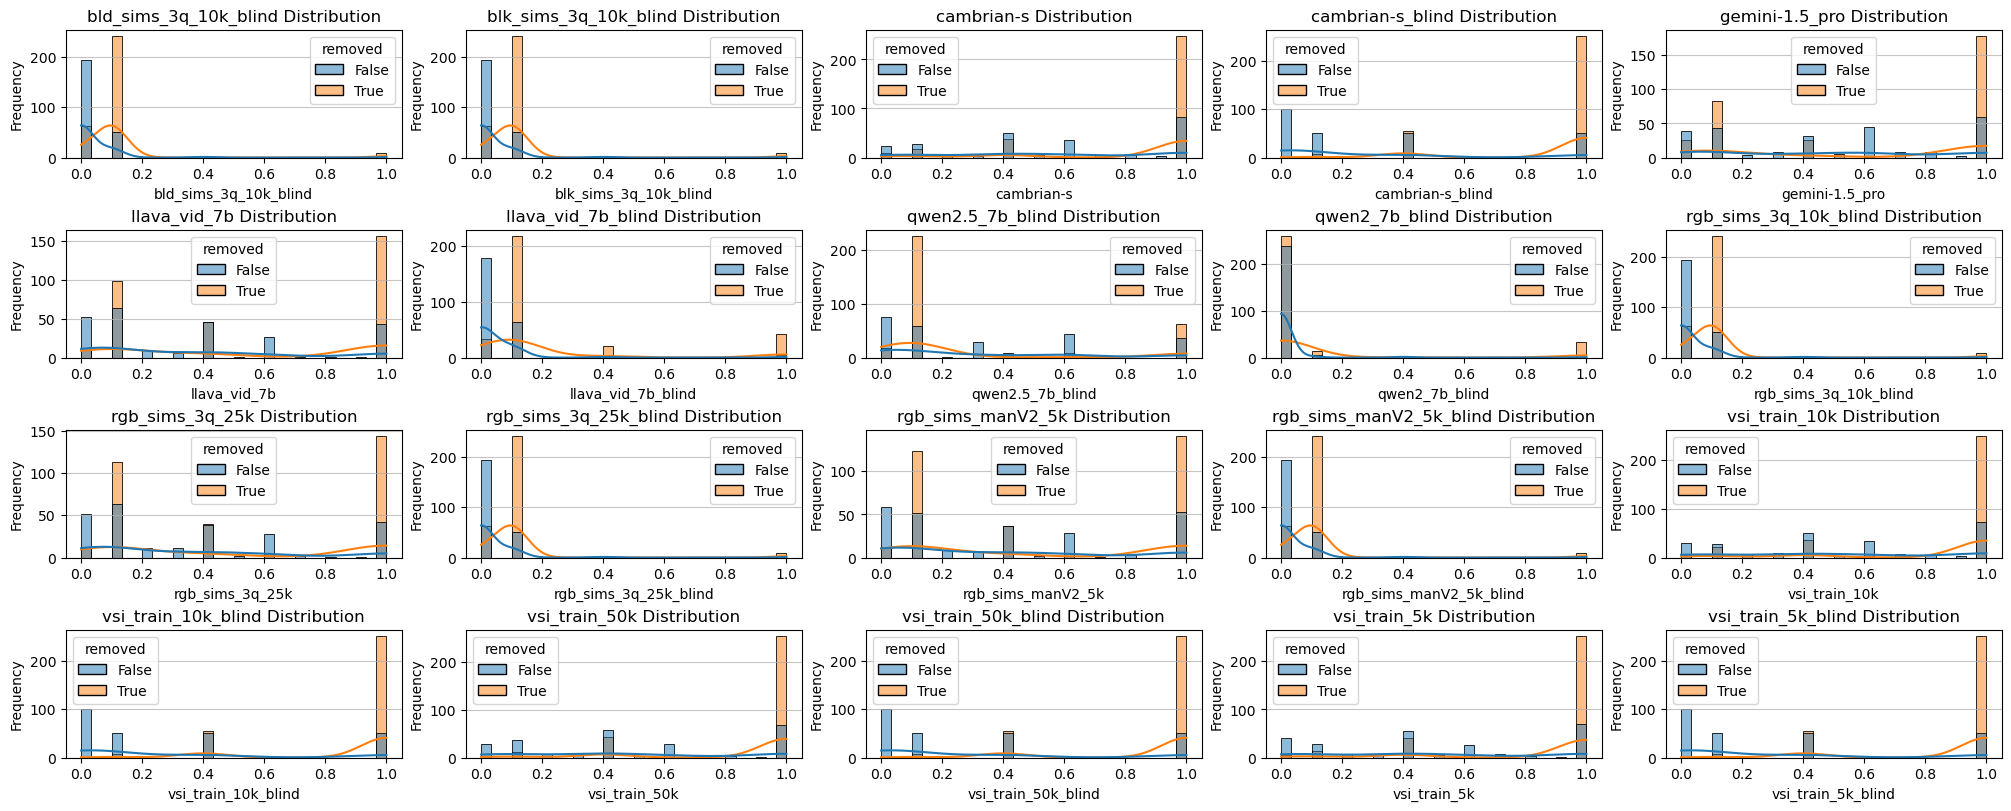

In [38]:
# plot the dist of the model cols colored by removed
fig, axes = plt.subplots(4, 5, figsize=(20, 8), constrained_layout=True)
for i, model in enumerate(models):
    ax = axes[i // 5, i % 5]
    sns.histplot(data=df_sorted, x=model, bins=30, kde=True, hue="removed", ax=ax)
    ax.set_title(f"{model} Distribution")
    ax.set_xlabel(model)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', alpha=0.75)

In [39]:
df_sorted.columns

Index(['id', 'dataset', 'scene_name', 'question_type', 'question',
       'ground_truth', 'options', 'bld_sims_3q_10k_blind',
       'blk_sims_3q_10k_blind', 'cambrian-s', 'cambrian-s_blind',
       'gemini-1.5_pro', 'llava_vid_7b', 'llava_vid_7b_blind',
       'qwen2.5_7b_blind', 'qwen2_7b_blind', 'rgb_sims_3q_10k_blind',
       'rgb_sims_3q_25k', 'rgb_sims_3q_25k_blind', 'rgb_sims_manV2_5k',
       'rgb_sims_manV2_5k_blind', 'vsi_train_10k', 'vsi_train_10k_blind',
       'vsi_train_50k', 'vsi_train_50k_blind', 'vsi_train_5k',
       'vsi_train_5k_blind', 'object', 'ground_truth_num', 'ground_truth_str',
       'obj_count', 'val_count', 'combo_count', 'obj_freq_score',
       'val_freq_score', 'combo_freq_score', 'bias_score', 'removed'],
      dtype='object')

In [40]:
# import numpy as np # Added for mean/std calculation
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, make_scorer # Added make_scorer for cross_val_score
# from sklearn.model_selection import StratifiedKFold, cross_val_score # Added KFold and cross_val_score
# from sklearn.preprocessing import LabelEncoder

# def evaluate_rf_bias_cv(scored_df: pd.DataFrame, n_splits: int = 5) -> tuple[float, float, pd.DataFrame]:
#     """
#     Trains and evaluates a RandomForestClassifier using k-fold cross-validation
#     on non-visual features of object_rel_distance questions to predict the
#     ground truth answer ('A'/'B'/'C'/'D').

#     Args:
#         scored_df: DataFrame containing features and the 'ground_truth' target column.
#                 Expected features: 'object_1', 'object_2', 'object_3', 'object_4',
#                                     'target_object', 'gt_obj_prob', 'pair_prob',
#                                     'ord_pair_prob'.
#         n_splits: Number of folds for StratifiedKFold cross-validation.

#     Returns:
#         A tuple containing:
#         - mean_accuracy (float): Mean accuracy across the cross-validation folds.
#         - std_accuracy (float): Standard deviation of accuracy across the folds.
#         - feature_importance_df (pd.DataFrame | None): DataFrame with feature importances
#         from a model trained on the full dataset, or None if calculation fails.
#     """
#     print(f"--- Starting RF Bias Evaluation (CV with {n_splits} splits) ---")

#     # --- 1. Select Features and Target ---
#     feature_cols = [
#         'object', 'obj_count',
#         'val_count', 'combo_count', 'obj_freq_score', 'val_freq_score',
#         'combo_freq_score', 'bias_score',
#     ]
#     target_col = 'ground_truth'

#     # Check for essential columns
#     required_cols = feature_cols + [target_col]
#     missing_cols = [col for col in required_cols if col not in scored_df.columns]
#     if missing_cols:
#         print(f"Error: Input DataFrame is missing required columns: {missing_cols}")
#         raise ValueError(f"Missing required columns: {missing_cols}")

#     # Create a working copy and drop rows with missing values in relevant columns
#     data = scored_df[required_cols].copy()
#     initial_rows = len(data)
#     data.dropna(inplace=True)
#     final_rows = len(data)
#     if final_rows < initial_rows:
#         print(f"Warning: Dropped {initial_rows - final_rows} rows due to missing values in features or target.")

#     if data.empty:
#         print("Error: DataFrame is empty after dropping NA. Cannot proceed.")
#         raise ValueError("DataFrame is empty after dropping NA.")

#     X = data[feature_cols]
#     y = data[target_col]

#     print(f"Using {len(X)} samples for evaluation.")

#     # --- 2. Preprocess Features ---
#     encoders = {}
#     X_encoded = X.copy()
#     categorical_cols = X.select_dtypes(include='object').columns

#     if not categorical_cols.empty:
#         print(f"Encoding categorical features: {list(categorical_cols)}")
#         for col in categorical_cols:
#             encoders[col] = LabelEncoder()
#             # Fit on the entire column before cross-validation
#             X_encoded[col] = encoders[col].fit_transform(X_encoded[col].astype(str))
#     else:
#         print("No categorical features found to encode.")

#     # --- 3. Define Model and Cross-Validation Strategy ---
#     model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

#     # Adjust n_splits if necessary based on class distribution
#     min_samples_per_class = y.value_counts().min()
#     if min_samples_per_class < n_splits:
#         print(f"Warning: The least populated class has only {min_samples_per_class} samples.")
#         if min_samples_per_class < 2:
#             print("Error: The least populated class has less than 2 samples. Cannot perform stratified CV.")
#             raise ValueError("Insufficient samples in the smallest class for stratified CV.")
#         print(f"Reducing n_splits from {n_splits} to {min_samples_per_class} to match the smallest class size.")
#         n_splits = min_samples_per_class

#     cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     # --- 4. Perform Cross-Validation ---
#     print(f"Performing {n_splits}-Fold Cross-Validation...")
#     try:
#         # Use cross_val_score to get accuracy for each fold
#         scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy', n_jobs=-1)
#         mean_accuracy = np.mean(scores)
#         std_accuracy = np.std(scores)
#         print(f"Scores for each fold: {scores}")
#         print(f"Mean Accuracy: {mean_accuracy:.4f}")
#         print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
#     except ValueError as e:
#         print(f"Error during cross-validation: {e}")
#         print("This might happen if a fold doesn't contain samples from all classes, especially with small datasets.")
#         return np.nan, np.nan, None # Return NaN if CV fails

#     # --- 5. Train Final Model and Get Feature Importances ---
#     feature_importance_df = None # Initialize as None
#     print("\nTraining final model on all data to get feature importances...")
#     try:
#         final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
#         final_model.fit(X_encoded, y)
#         importances = final_model.feature_importances_
#         feature_importance_df = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
#         feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)
#         print("\nFeature Importances (from final model trained on all data):")
#         print(feature_importance_df)
#     except Exception as e:
#         print(f"Could not calculate feature importances: {e}")

#     print("--- Evaluation Complete ---")
#     return mean_accuracy, std_accuracy, feature_importance_df

# evaluate_rf_bias_cv(df_sorted, n_splits=5);

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder


def evaluate_rf_bias_cv_regression(scored_df: pd.DataFrame, n_splits: int = 5) -> tuple[float, float, pd.DataFrame]:
    """
    Trains and evaluates a RandomForestRegressor using k-fold cross-validation
    on non-visual features of object_rel_distance questions to predict the
    ground truth answer (numerical regression).

    Args:
        scored_df: DataFrame containing features and the 'ground_truth' target column.
                Expected features: 'object_1', 'object_2', 'object_3', 'object_4',
                                    'target_object', 'gt_obj_prob', 'pair_prob',
                                    'ord_pair_prob'.
        n_splits: Number of folds for KFold cross-validation.

    Returns:
        A tuple containing:
        - mean_mse (float): Mean MSE across the cross-validation folds.
        - std_mse (float): Standard deviation of MSE across the folds.
        - feature_importance_df (pd.DataFrame | None): DataFrame with feature importances
        from a model trained on the full dataset, or None if calculation fails.
    """
    print(f"--- Starting RF Bias Evaluation (Regression CV with {n_splits} splits) ---")

    # --- 1. Select Features and Target ---
    feature_cols = [
        'object', 'obj_count',
        # 'val_count', 'val_freq_score',  # these are 1:1 with the gt label
        'combo_count', 'obj_freq_score',
        'combo_freq_score', 'bias_score',
    ]
    target_col = 'ground_truth'

    # Check for essential columns
    required_cols = feature_cols + [target_col]
    missing_cols = [col for col in required_cols if col not in scored_df.columns]
    if missing_cols:
        print(f"Error: Input DataFrame is missing required columns: {missing_cols}")
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Create a working copy and drop rows with missing values in relevant columns
    data = scored_df[required_cols].copy()
    initial_rows = len(data)
    data.dropna(inplace=True)
    final_rows = len(data)
    if final_rows < initial_rows:
        print(f"Warning: Dropped {initial_rows - final_rows} rows due to missing values in features or target.")

    if data.empty:
        print("Error: DataFrame is empty after dropping NA. Cannot proceed.")
        raise ValueError("DataFrame is empty after dropping NA.")

    X = data[feature_cols]
    y = data[target_col]

    print(f"Using {len(X)} samples for evaluation.")

    # --- 2. Preprocess Features ---
    encoders = {}
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include='object').columns

    if not categorical_cols.empty:
        print(f"Encoding categorical features: {list(categorical_cols)}")
        for col in categorical_cols:
            encoders[col] = LabelEncoder()
            # Fit on the entire column before cross-validation
            X_encoded[col] = encoders[col].fit_transform(X_encoded[col].astype(str))
    else:
        print("No categorical features found to encode.")

    # --- 3. Define Model and Cross-Validation Strategy ---
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # --- 4. Perform Cross-Validation ---
    print(f"Performing {n_splits}-Fold Cross-Validation...")
    try:
        # Use cross_val_score to get MSE for each fold
        scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
        mean_mse = -np.mean(scores)  # Convert negative MSE to positive
        std_mse = np.std(scores)
        print(f"Scores for each fold (negative MSE): {scores}")
        print(f"Mean MSE: {mean_mse:.4f}")
        print(f"Standard Deviation of MSE: {std_mse:.4f}")
    except ValueError as e:
        print(f"Error during cross-validation: {e}")
        return np.nan, np.nan, None  # Return NaN if CV fails

    # --- 5. Train Final Model and Get Feature Importances ---
    feature_importance_df = None  # Initialize as None
    print("\nTraining final model on all data to get feature importances...")
    try:
        final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        final_model.fit(X_encoded, y)
        importances = final_model.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)
        print("\nFeature Importances (from final model trained on all data):")
        print(feature_importance_df)
    except Exception as e:
        print(f"Could not calculate feature importances: {e}")

    print("--- Evaluation Complete ---")
    return mean_mse, std_mse, feature_importance_df


evaluate_rf_bias_cv_regression(df_sorted, n_splits=30);

--- Starting RF Bias Evaluation (Regression CV with 30 splits) ---
Using 565 samples for evaluation.
Encoding categorical features: ['object']
Performing 30-Fold Cross-Validation...
Scores for each fold (negative MSE): [-1.96031579e-01 -1.09021004e+01 -9.00322988e-01 -2.29638409e+00
 -4.55034480e-01 -1.54563006e+01 -1.52000000e-02 -2.00997865e+00
 -1.04212080e+01 -2.49163312e+00 -3.26816801e-02 -4.78947368e-04
 -1.25087104e+00 -1.87542434e-01 -1.19253947e-01 -1.22932895e-01
 -2.12629376e-02 -1.09936763e+01 -2.50553287e+00 -8.17838197e+00
 -3.03163158e-01 -1.62996053e-01 -1.19107274e-01 -1.05013604e+01
 -2.17929334e-02 -1.52093333e+00 -4.48167222e+00 -1.98280211e+01
 -3.04444444e-03 -2.22222222e-05]
Mean MSE: 3.5166
Standard Deviation of MSE: 5.2711

Training final model on all data to get feature importances...

Feature Importances (from final model trained on all data):
            feature  importance
0        bias_score    0.292463
1         obj_count    0.213809
2    obj_freq_score 

In [42]:
df_sorted

id      dataset    scene_name    question_type  \
68     69  arkitscenes      44358499  object_counting   
548  4592      scannet  scene0221_01  object_counting   
83     84  arkitscenes      45261142  object_counting   
80     81  arkitscenes      45260928  object_counting   
78     79  arkitscenes      45260905  object_counting   
..    ...          ...           ...              ...   
330  2651    scannetpp    9071e139d9  object_counting   
259  2579    scannetpp    b0a08200c9  object_counting   
272  2592    scannetpp    25f3b7a318  object_counting   
316  2637    scannetpp    09c1414f1b  object_counting   
275  2595    scannetpp    f3d64c30f8  object_counting   

                                         question  ground_truth options  \
68            How many table(s) are in this room?             2    None   
548           How many table(s) are in this room?             2    None   
83            How many table(s) are in this room?             2    None   
80            How many table(s) are in this room?             2    None   
78            How many table(s) are in this room?             2    None   
..                                            ...           ...     ...   
330         How many cushion(s) are in this room?             6    None   
259  How many computer tower(s) are in this room?            25    None   
272           How many shoes(s) are in this room?            10    None   
316    How many refrigerator(s) are in this room?             1    None   
275           How many crate(s) are in this room?             9    None   

     bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  \
68                     0.1                    0.1         1.0   
548                    0.1                    0.1         1.0   
83                     0.1                    0.1         1.0   
80                     0.1                    0.1         0.1   
78                     0.1                    0.1         0.1   
..                     ...                    ...         ...   
330                    0.0                    0.0         0.4   
259                    0.0                    0.0         0.0   
272                    0.0                    0.0         1.0   
316                    1.0                    1.0         0.0   
275                    0.0                    0.0         0.0   

     cambrian-s_blind  gemini-1.5_pro  llava_vid_7b  llava_vid_7b_blind  \
68                1.0             1.0           1.0                 0.1   
548               1.0             0.1           1.0                 0.1   
83                1.0             0.1           1.0                 0.1   
80                1.0             0.1           1.0                 0.1   
78                1.0             1.0           1.0                 0.1   
..                ...             ...           ...                 ...   
330               0.0             0.7           0.0                 0.0   
259               0.0             1.0           0.0                 0.0   
272               0.0             0.0           1.0                 0.0   
316               0.0             0.1           0.1                 1.0   
275               0.0             0.2           0.0                 0.0   

     qwen2.5_7b_blind  qwen2_7b_blind  rgb_sims_3q_10k_blind  rgb_sims_3q_25k  \
68                0.1             0.0                    0.1              1.0   
548               0.1             0.0                    0.1              1.0   
83                0.1             0.0                    0.1              0.1   
80                0.1             0.0                    0.1              0.1   
78                0.1             0.0                    0.1              1.0   
..                ...             ...                    ...              ...   
330               0.1             0.0                    0.0              0.0   
259               0.0             0.0                    0.0              0.0   
272       